In [3]:
import xarray as xr
import numpy as np
import more_itertools as mit
import glob
import datetime as dt 
#import vor_fast
#import vor_fast_setup
import pandas as pd
import sys
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator
from scipy import stats
import statsmodels.api as sm

# Constants

In [5]:
!ls /work/bd1022/b381258/CMIP6/*zg*historical*

/work/bd1022/b381258/CMIP6/zg_day_MPI-ESM1-2-LR_historical_r10i1p1f1_@10and50and100hPa_1979-2014.nc
/work/bd1022/b381258/CMIP6/zg_day_MPI-ESM1-2-LR_historical_r11i1p1f1_@10and50and100hPa_1979-2014.nc
/work/bd1022/b381258/CMIP6/zg_day_MPI-ESM1-2-LR_historical_r12i1p1f1_@10and50and100hPa_1979-2014.nc
/work/bd1022/b381258/CMIP6/zg_day_MPI-ESM1-2-LR_historical_r13i1p1f1_@10and50and100hPa_1979-2014.nc
/work/bd1022/b381258/CMIP6/zg_day_MPI-ESM1-2-LR_historical_r14i1p1f1_@10and50and100hPa_1979-2014.nc
/work/bd1022/b381258/CMIP6/zg_day_MPI-ESM1-2-LR_historical_r15i1p1f1_@10and50and100hPa_1979-2014.nc
/work/bd1022/b381258/CMIP6/zg_day_MPI-ESM1-2-LR_historical_r16i1p1f1_@10and50and100hPa_1979-2014.nc
/work/bd1022/b381258/CMIP6/zg_day_MPI-ESM1-2-LR_historical_r17i1p1f1_@10and50and100hPa_1979-2014.nc
/work/bd1022/b381258/CMIP6/zg_day_MPI-ESM1-2-LR_historical_r18i1p1f1_@10and50and100hPa_1979-2014.nc
/work/bd1022/b381258/CMIP6/zg_day_MPI-ESM1-2-LR_historical_r19i1p1f1_@10and50and100hPa_1979-2014.nc


In [2]:
!ls -sh /work/bd1022/b381258/CMIP6/zg_DKRZ/*zg*

443M /work/bd1022/b381258/CMIP6/zg_DKRZ/zg_day_MPI-ESM1-2-LR_historical_r10i1p1f1_@10and50and100hPa_1979-2014.nc
443M /work/bd1022/b381258/CMIP6/zg_DKRZ/zg_day_MPI-ESM1-2-LR_historical_r11i1p1f1_@10and50and100hPa_1979-2014.nc
443M /work/bd1022/b381258/CMIP6/zg_DKRZ/zg_day_MPI-ESM1-2-LR_historical_r12i1p1f1_@10and50and100hPa_1979-2014.nc
443M /work/bd1022/b381258/CMIP6/zg_DKRZ/zg_day_MPI-ESM1-2-LR_historical_r13i1p1f1_@10and50and100hPa_1979-2014.nc
443M /work/bd1022/b381258/CMIP6/zg_DKRZ/zg_day_MPI-ESM1-2-LR_historical_r14i1p1f1_@10and50and100hPa_1979-2014.nc
443M /work/bd1022/b381258/CMIP6/zg_DKRZ/zg_day_MPI-ESM1-2-LR_historical_r15i1p1f1_@10and50and100hPa_1979-2014.nc
443M /work/bd1022/b381258/CMIP6/zg_DKRZ/zg_day_MPI-ESM1-2-LR_historical_r16i1p1f1_@10and50and100hPa_1979-2014.nc
443M /work/bd1022/b381258/CMIP6/zg_DKRZ/zg_day_MPI-ESM1-2-LR_historical_r17i1p1f1_@10and50and100hPa_1979-2014.nc
443M /work/bd1022/b381258/CMIP6/zg_DKRZ/zg_day_MPI-ESM1-2-LR_historical_r18i1p1f1_@10and50and100

In [2]:
!ls /work/bd1022/b381258/CMIP6/zg_DKRZ/*ua*

/work/bd1022/b381258/CMIP6/zg_DKRZ/ua_day_MPI-ESM1-2-LR_historical_r10i1p1f1_@10hPa_1979-2014.nc
/work/bd1022/b381258/CMIP6/zg_DKRZ/ua_day_MPI-ESM1-2-LR_historical_r11i1p1f1_@10hPa_1979-2014.nc
/work/bd1022/b381258/CMIP6/zg_DKRZ/ua_day_MPI-ESM1-2-LR_historical_r12i1p1f1_@10hPa_1979-2014.nc
/work/bd1022/b381258/CMIP6/zg_DKRZ/ua_day_MPI-ESM1-2-LR_historical_r13i1p1f1_@10hPa_1979-2014.nc
/work/bd1022/b381258/CMIP6/zg_DKRZ/ua_day_MPI-ESM1-2-LR_historical_r14i1p1f1_@10hPa_1979-2014.nc
/work/bd1022/b381258/CMIP6/zg_DKRZ/ua_day_MPI-ESM1-2-LR_historical_r15i1p1f1_@10hPa_1979-2014.nc
/work/bd1022/b381258/CMIP6/zg_DKRZ/ua_day_MPI-ESM1-2-LR_historical_r16i1p1f1_@10hPa_1979-2014.nc
/work/bd1022/b381258/CMIP6/zg_DKRZ/ua_day_MPI-ESM1-2-LR_historical_r17i1p1f1_@10hPa_1979-2014.nc
/work/bd1022/b381258/CMIP6/zg_DKRZ/ua_day_MPI-ESM1-2-LR_historical_r18i1p1f1_@10hPa_1979-2014.nc
/work/bd1022/b381258/CMIP6/zg_DKRZ/ua_day_MPI-ESM1-2-LR_historical_r19i1p1f1_@10hPa_1979-2014.nc
/work/bd1022/b381258/CMIP6/zg_

In [ ]:

!tar chvfz SSW_.tar.gz ./SSWs_stats/*


In [3]:
!ls ./SSWs_stats/

CanESM5_modes_nc
CanESM5_r10i1p1f1_all_SSW_dates.npy
CanESM5_r10i1p1f1.csv
CanESM5_r10i1p1f1_disp_dates_all.npy
CanESM5_r10i1p1f1_split_dates_all.npy
CanESM5_r10i1p1f1_unclass_dates_all.npy
CanESM5_r10i1p2f1_all_SSW_dates.npy
CanESM5_r10i1p2f1.csv
CanESM5_r10i1p2f1_disp_dates_all.npy
CanESM5_r10i1p2f1_split_dates_all.npy
CanESM5_r10i1p2f1_unclass_dates_all.npy
CanESM5_r11i1p1f1_all_SSW_dates.npy
CanESM5_r11i1p1f1.csv
CanESM5_r11i1p1f1_disp_dates_all.npy
CanESM5_r11i1p1f1_split_dates_all.npy
CanESM5_r11i1p1f1_unclass_dates_all.npy
CanESM5_r12i1p1f1_all_SSW_dates.npy
CanESM5_r12i1p1f1.csv
CanESM5_r12i1p1f1_disp_dates_all.npy
CanESM5_r12i1p1f1_split_dates_all.npy
CanESM5_r12i1p1f1_unclass_dates_all.npy
CanESM5_r13i1p1f1_all_SSW_dates.npy
CanESM5_r13i1p1f1.csv
CanESM5_r13i1p1f1_disp_dates_all.npy
CanESM5_r13i1p1f1_split_dates_all.npy
CanESM5_r13i1p1f1_unclass_dates_all.npy
CanESM5_r14i1p1f1_all_SSW_dates.npy
CanESM5_r14i1p1f1.csv
CanESM5_r14i1p1f1_disp_dates_all.npy
CanESM5_r14i1p1f1_split

In [5]:
plt.rcParams.update({'font.size': 28, "contour.linewidth": 4})
root_path = '/work/bd1022/b381258/CMIP6/'
time_dict = dict(time = slice('1979-01',None))
out_dir = './SSWs_stats/'

In [6]:
filepaths1=[]
for filepath1 in glob.iglob(f'{root_path}*ua*MPI-ESM1-2-LR-all*'):
    filepaths1.append(filepath1)
filepaths1.sort()

# filepaths to obtain 10hPa GPH for northern hemisphere
filepaths2=[]
for filepath2 in glob.iglob(f'{root_path}*MPI-ESM1-2-LR-all-from1920*moments*'):
    filepaths2.append(filepath2)
filepaths2.sort()

In [6]:
filepaths1

['/work/bd1022/b381258/CMIP6/ua_day_MPI-ESM1-2-LR-all_historical_@10hPa_1979-2014.nc']

In [7]:
filepaths2

['/work/bd1022/b381258/CMIP6/MPI-ESM1-2-LR-all-from1920_moments@10and50and100hPa.nc']

In [69]:
model_ls = list(map(lambda x: x.split('.')[2], filepaths2))
model_ls

NameError: name 'filepaths2' is not defined

In [70]:
model_ls = list(map(lambda x: x.split('.')[1], filepaths1))
model_ls

[]

# SSW frequency

Code adopted from [Hall et al (2021)](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2021JD034759).

In [7]:
moments

<xarray.Dataset>
Dimensions:             (ens: 50, time: 5445)
Coordinates:
  * time                (time) object 1979-01-01 12:00:00 ... 2014-12-31 12:0...
    plev                float64 1e+03
  * ens                 (ens) object 'r10i1p1f1' 'r11i1p1f1' ... 'r9i1p1f1'
Data variables:
    angle               (ens, time) float64 ...
    aspect_ratio        (ens, time) float64 ...
    objective_area      (ens, time) float64 ...
    kurtosis            (ens, time) float64 ...
    centroid_latitude   (ens, time) float64 ...
    centroid_longitude  (ens, time) float64 ...

In [18]:
sel_dict = dict(ens = 'r10i1p1f1', time =  '2013-03-11T12:00:00')
moments.sel(**sel_dict).to_dataframe()

,angle,aspect_ratio,objective_area,kurtosis,centroid_latitude,centroid_longitude,plev,ens
time,,,,,,,,
2013-03-11 12:00:00,44.963781,1.778749,3.756748e+10,0.624507,65.414398,-51.120421,1000.0,r10i1p1f1


In [23]:
sel_dict = dict(ens = 'r10i1p1f1', time =  '1982-03-28T12:00:00')
moments.sel(**sel_dict).to_dataframe()

,angle,aspect_ratio,objective_area,kurtosis,centroid_latitude,centroid_longitude,plev,ens
time,,,,,,,,
1982-03-28 12:00:00,28.148703,1.359858,2.872748e+10,0.227642,62.604751,20.934528,1000.0,r10i1p1f1


In [59]:
ds = xr.open_dataset('/work/bd1022/b381258/CMIP6/CMIP.MPI-M.MPI-ESM1-2-LR.historical.day.gn_moments@10and50and100hPa.nc')
sel_dict = dict(member_id = 'r10i1p1f1', time =  '1982-03-28T12:00:00', plev = [1000])

ds.sel(**sel_dict).to_dataframe()

,angle,aspect_ratio,objective_area,kurtosis,centroid_latitude,centroid_longitude,time,member_id
plev,,,,,,,,
1000.0,28.14885,1.359859,2.872817e+10,0.227644,62.604734,20.934465,1982-03-28 12:00:00,r10i1p1f1


In [45]:
!ls /work/bd1022/b381258/CMIP6/*MPI-ESM1-2-LR*

/work/bd1022/b381258/CMIP6/CMIP.MPI-ESM1-2-LR.amip.Eday.gn_zg_1979-2014.nc
/work/bd1022/b381258/CMIP6/CMIP.MPI-ESM1-2-LR.amip.EdayZ.gn_ua.nc
/work/bd1022/b381258/CMIP6/CMIP.MPI-ESM1-2-LR.historical.day.gn_ua@10hPa.nc
/work/bd1022/b381258/CMIP6/CMIP.MPI-ESM1-2-LR.historical.Emon.gn_utendogw@10@hPa.nc
/work/bd1022/b381258/CMIP6/CMIP.MPI-ESM1-2-LR.historical.Emon.gn_utendogw@200-70@hPa.nc
/work/bd1022/b381258/CMIP6/CMIP.MPI-ESM1-2-LR.historical.Emon.gn_utendogw@300-1@hPa.nc
/work/bd1022/b381258/CMIP6/CMIP.MPI-ESM1-2-LR.historical.Emon.gn_utendogw@70@hPa.nc
/work/bd1022/b381258/CMIP6/CMIP.MPI-M.MPI-ESM1-2-LR.historical.day.gn_moments@10and50and100hPa.nc
/work/bd1022/b381258/CMIP6/MPI-ESM1-2-LR-all-from1920_moments@10and50and100hPa.nc
/work/bd1022/b381258/CMIP6/MPI-ESM1-2-LR-all_moments@10and50and100hPa.nc
/work/bd1022/b381258/CMIP6/MPI-ESM1-2-LR.amip.Eday_moments_1979-2014_NHonly.nc
/work/bd1022/b381258/CMIP6/ScenarioMIP.MPI-M.MPI-ESM1-2-LR.ssp585.day.gn_moments@10and100hPa.nc
/work/bd1022

In [63]:
list(temp.groupby('time.year'))

[(1979,
  <xarray.DataArray 'ua' (time: 151)>
  [151 values with dtype=float32]
  Coordinates:
    * time     (time) object 1979-01-01 12:00:00 ... 1979-12-31 12:00:00
      plev     float64 1e+03
      lat      float64 ...
      ens      <U9 'r10i1p1f1'
  Attributes:
      _ChunkSizes:    [ 1 39 96]
      long_name:      Eastward Wind
      standard_name:  eastward_wind
      cell_methods:   longitude: mean time: mean
      comment:        Zonal wind (positive in a eastward direction).
      units:          m s-1
      history:        2019-09-12T18:45:44Z altered by CMOR: Reordered dimension...),
 (1980,
  <xarray.DataArray 'ua' (time: 152)>
  [152 values with dtype=float32]
  Coordinates:
    * time     (time) object 1980-01-01 12:00:00 ... 1980-12-31 12:00:00
      plev     float64 1e+03
      lat      float64 ...
      ens      <U9 'r10i1p1f1'
  Attributes:
      _ChunkSizes:    [ 1 39 96]
      long_name:      Eastward Wind
      standard_name:  eastward_wind
      cell_methods:  

In [13]:
temp_sel#.plot()

<xarray.DataArray 'ua' (time: 151)>
array([ 3.603528e+01,  3.090479e+01,  2.643542e+01,  2.065504e+01,
        1.571030e+01,  1.375754e+01,  1.088660e+01,  9.224274e+00,
        8.434097e+00,  9.598587e+00,  9.681870e+00,  9.597290e+00,
        1.140634e+01,  9.103256e+00,  9.009232e+00,  7.737701e+00,
        8.771332e+00,  1.146111e+01,  1.533943e+01,  1.532773e+01,
        1.711171e+01,  1.939450e+01,  1.751819e+01,  1.953850e+01,
        2.313760e+01,  2.651759e+01,  2.851146e+01,  3.219159e+01,
        3.423361e+01,  3.304048e+01,  3.134500e+01,  2.525330e+01,
        2.252283e+01,  2.362727e+01,  2.867662e+01,  3.186084e+01,
        3.024045e+01,  3.053912e+01,  3.006783e+01,  2.974426e+01,
        2.759683e+01,  2.623892e+01,  2.695813e+01,  3.128505e+01,
        3.772459e+01,  3.878978e+01,  4.178728e+01,  4.171581e+01,
        4.200854e+01,  4.335588e+01,  4.395224e+01,  4.473100e+01,
        4.427666e+01,  4.144261e+01,  3.667299e+01,  3.259010e+01,
        2.903902e+01,  2.612231e+01,  2.571103e+01,  2.791731e+01,
        2.675700e+01,  2.159799e+01,  1.947641e+01,  1.892252e+01,
        1.619127e+01,  1.079301e+01,  8.830765e+00,  1.028062e+01,
        1.128407e+01,  1.196049e+01,  9.085373e+00,  5.291748e+00,
        8.728027e-03, -7.665726e+00, -1.039487e+01, -1.016418e+01,
       -7.842957e+00, -9.228210e+00, -1.059657e+01, -1.111302e+01,
       -1.135240e+01, -1.303918e+01, -1.418987e+01, -1.473306e+01,
       -1.424463e+01, -1.479288e+01, -1.653212e+01, -1.428802e+01,
       -1.253288e+01, -8.822174e+00,  1.735682e+01,  1.774364e+01,
        1.688712e+01,  1.794937e+01,  1.621584e+01,  1.098553e+01,
        7.974716e+00,  8.188904e+00,  8.398376e+00,  7.707245e+00,
        3.947896e+00,  3.009537e+00, -2.119141e-01, -1.396240e+00,
       -2.474472e+00, -2.421820e+00,  2.350026e+00,  8.266240e+00,
        1.394061e+01,  1.748374e+01,  1.710932e+01,  1.566856e+01,
        1.571273e+01,  1.556794e+01,  1.480607e+01,  1.701656e+01,
        1.909286e+01,  2.114624e+01,  2.265642e+01,  2.436234e+01,
        2.419437e+01,  2.261936e+01,  2.551232e+01,  2.181956e+01,
        1.720731e+01,  1.512174e+01,  1.030041e+01,  6.087061e+00,
        1.687616e+00, -3.571406e+00, -7.104666e+00, -8.834061e+00,
       -1.020390e+01, -1.359514e+01, -1.614101e+01, -1.590732e+01,
       -1.599188e+01, -1.766949e+01, -1.558908e+01, -1.262206e+01,
       -7.599060e+00, -3.101501e+00,  1.104904e+00,  5.545547e+00,
        1.185536e+01,  1.506680e+01,  1.805423e+01,  1.968500e+01,
        2.003951e+01,  2.088852e+01,  2.291438e+01], dtype=float32)
Coordinates:
  * time     (time) object 2014-01-01 12:00:00 ... 2014-12-31 12:00:00
    plev     float64 1e+03
    lat      float64 ...
    ens      <U8 'r9i1p1f1'
Attributes:
    _ChunkSizes:    [ 1 39 96]
    long_name:      Eastward Wind
    standard_name:  eastward_wind
    cell_methods:   longitude: mean time: mean
    comment:        Zonal wind (positive in a eastward direction).
    units:          m s-1
    history:        2019-09-12T18:45:44Z altered by CMOR: Reordered dimension...

In [22]:
DJFM = temp.time.dt.month.isin([12, 1, 2, 3])
MAMJ = temp.time.dt.month.isin([3, 4, 5, 6])
concat_dim = xr.DataArray(["DJFM","MAMJ"], dims="season")

seasons = xr.concat([DJFM,MAMJ], dim=concat_dim)
seasons

<xarray.DataArray 'month' (season: 2, time: 5445)>
array([[ True,  True,  True, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False]])
Coordinates:
  * time     (time) object 1979-01-01 12:00:00 ... 2014-12-31 12:00:00
    plev     float64 1e+03
    lat      float64 60.62
    ens      <U8 'r9i1p1f1'
  * season   (season) <U4 'DJFM' 'MAMJ'

In [57]:
temp

<xarray.DataArray 'ua' (time: 5445)>
array([42.38443 , 38.962067, 29.826431, ..., 20.039505, 20.88852 , 22.914383],
      dtype=float32)
Coordinates:
  * time     (time) object 1979-01-01 12:00:00 ... 2014-12-31 12:00:00
    plev     float64 1e+03
    lat      float64 ...
    ens      <U8 'r9i1p1f1'
Attributes:
    _ChunkSizes:    [ 1 39 96]
    long_name:      Eastward Wind
    standard_name:  eastward_wind
    cell_methods:   longitude: mean time: mean
    comment:        Zonal wind (positive in a eastward direction).
    units:          m s-1
    history:        2019-09-12T18:45:44Z altered by CMOR: Reordered dimension...

In [56]:
temp*seasons

<xarray.DataArray (time: 5445, season: 2)>
array([[42.38443 ,  0.      ],
       [38.962067,  0.      ],
       [29.826431,  0.      ],
       ...,
       [20.039505,  0.      ],
       [20.88852 ,  0.      ],
       [22.914383,  0.      ]], dtype=float32)
Coordinates:
  * time     (time) object 1979-01-01 12:00:00 ... 2014-12-31 12:00:00
    plev     float64 1e+03
    lat      float64 60.62
    ens      <U8 'r9i1p1f1'
  * season   (season) <U4 'DJFM' 'MAMJ'

In [23]:
xr.dot(temp, seasons)

<xarray.DataArray (season: 2)>
array([92286.98 , 16854.697], dtype=float32)
Coordinates:
    plev     float64 1e+03
    lat      float64 60.62
    ens      <U8 'r9i1p1f1'
  * season   (season) <U4 'DJFM' 'MAMJ'

In [28]:
temp[:90]

<xarray.DataArray 'ua' (time: 90)>
[90 values with dtype=float32]
Coordinates:
  * time     (time) object 1979-01-01 12:00:00 ... 1979-03-31 12:00:00
    plev     float64 1e+03
    lat      float64 ...
    ens      <U8 'r9i1p1f1'
Attributes:
    _ChunkSizes:    [ 1 39 96]
    long_name:      Eastward Wind
    standard_name:  eastward_wind
    cell_methods:   longitude: mean time: mean
    comment:        Zonal wind (positive in a eastward direction).
    units:          m s-1
    history:        2019-09-12T18:45:44Z altered by CMOR: Reordered dimension...

In [53]:
temp.shift(time = -30)

<xarray.DataArray 'ua' (time: 5445)>
array([26.46701 , 30.276993, 36.34709 , ...,       nan,       nan,
             nan], dtype=float32)
Coordinates:
  * time     (time) object 1979-01-01 12:00:00 ... 2014-12-31 12:00:00
    plev     float64 1e+03
    lat      float64 ...
    ens      <U8 'r9i1p1f1'
Attributes:
    _ChunkSizes:    [ 1 39 96]
    long_name:      Eastward Wind
    standard_name:  eastward_wind
    cell_methods:   longitude: mean time: mean
    comment:        Zonal wind (positive in a eastward direction).
    units:          m s-1
    history:        2019-09-12T18:45:44Z altered by CMOR: Reordered dimension...

In [55]:
temp_sel

<xarray.DataArray 'ua' (time: 151)>
array([ 3.603528e+01,  3.090479e+01,  2.643542e+01,  2.065504e+01,
        1.571030e+01,  1.375754e+01,  1.088660e+01,  9.224274e+00,
        8.434097e+00,  9.598587e+00,  9.681870e+00,  9.597290e+00,
        1.140634e+01,  9.103256e+00,  9.009232e+00,  7.737701e+00,
        8.771332e+00,  1.146111e+01,  1.533943e+01,  1.532773e+01,
        1.711171e+01,  1.939450e+01,  1.751819e+01,  1.953850e+01,
        2.313760e+01,  2.651759e+01,  2.851146e+01,  3.219159e+01,
        3.423361e+01,  3.304048e+01,  3.134500e+01,  2.525330e+01,
        2.252283e+01,  2.362727e+01,  2.867662e+01,  3.186084e+01,
        3.024045e+01,  3.053912e+01,  3.006783e+01,  2.974426e+01,
        2.759683e+01,  2.623892e+01,  2.695813e+01,  3.128505e+01,
        3.772459e+01,  3.878978e+01,  4.178728e+01,  4.171581e+01,
        4.200854e+01,  4.335588e+01,  4.395224e+01,  4.473100e+01,
        4.427666e+01,  4.144261e+01,  3.667299e+01,  3.259010e+01,
        2.903902e+01,  2.612231e+01,  2.571103e+01,  2.791731e+01,
        2.675700e+01,  2.159799e+01,  1.947641e+01,  1.892252e+01,
        1.619127e+01,  1.079301e+01,  8.830765e+00,  1.028062e+01,
        1.128407e+01,  1.196049e+01,  9.085373e+00,  5.291748e+00,
        8.728027e-03, -7.665726e+00, -1.039487e+01, -1.016418e+01,
       -7.842957e+00, -9.228210e+00, -1.059657e+01, -1.111302e+01,
       -1.135240e+01, -1.303918e+01, -1.418987e+01, -1.473306e+01,
       -1.424463e+01, -1.479288e+01, -1.653212e+01, -1.428802e+01,
       -1.253288e+01, -8.822174e+00,  1.735682e+01,  1.774364e+01,
        1.688712e+01,  1.794937e+01,  1.621584e+01,  1.098553e+01,
        7.974716e+00,  8.188904e+00,  8.398376e+00,  7.707245e+00,
        3.947896e+00,  3.009537e+00, -2.119141e-01, -1.396240e+00,
       -2.474472e+00, -2.421820e+00,  2.350026e+00,  8.266240e+00,
        1.394061e+01,  1.748374e+01,  1.710932e+01,  1.566856e+01,
        1.571273e+01,  1.556794e+01,  1.480607e+01,  1.701656e+01,
        1.909286e+01,  2.114624e+01,  2.265642e+01,  2.436234e+01,
        2.419437e+01,  2.261936e+01,  2.551232e+01,  2.181956e+01,
        1.720731e+01,  1.512174e+01,  1.030041e+01,  6.087061e+00,
        1.687616e+00, -3.571406e+00, -7.104666e+00, -8.834061e+00,
       -1.020390e+01, -1.359514e+01, -1.614101e+01, -1.590732e+01,
       -1.599188e+01, -1.766949e+01, -1.558908e+01, -1.262206e+01,
       -7.599060e+00, -3.101501e+00,  1.104904e+00,  5.545547e+00,
        1.185536e+01,  1.506680e+01,  1.805423e+01,  1.968500e+01,
        2.003951e+01,  2.088852e+01,  2.291438e+01], dtype=float32)
Coordinates:
  * time     (time) object 2014-01-01 12:00:00 ... 2014-12-31 12:00:00
    plev     float64 1e+03
    lat      float64 ...
    ens      <U8 'r9i1p1f1'
Attributes:
    _ChunkSizes:    [ 1 39 96]
    long_name:      Eastward Wind
    standard_name:  eastward_wind
    cell_methods:   longitude: mean time: mean
    comment:        Zonal wind (positive in a eastward direction).
    units:          m s-1
    history:        2019-09-12T18:45:44Z altered by CMOR: Reordered dimension...

In [62]:
df.groupby().

KeyError: 1

In [69]:
temp[temp.time.dt.month.isin([12,1,2,3])]

<xarray.DataArray 'ua' (time: 4365)>
array([42.38443 , 38.962067, 29.826431, ..., 20.039505, 20.88852 , 22.914383],
      dtype=float32)
Coordinates:
  * time     (time) object 1979-01-01 12:00:00 ... 2014-12-31 12:00:00
    plev     float64 1e+03
    lat      float64 ...
    ens      <U8 'r9i1p1f1'
Attributes:
    _ChunkSizes:    [ 1 39 96]
    long_name:      Eastward Wind
    standard_name:  eastward_wind
    cell_methods:   longitude: mean time: mean
    comment:        Zonal wind (positive in a eastward direction).
    units:          m s-1
    history:        2019-09-12T18:45:44Z altered by CMOR: Reordered dimension...

In [37]:
df = temp.to_pandas()
new_index = temp.indexes['time'].to_datetimeindex()
df.index = new_index

In [72]:
#g = pd.Grouper(freq='4AS', origin = "1979-11-01")
g = pd.Grouper(freq='MS')#, origin = "1979-11-01")
for i,j in df.groupby(g):#.mean()
    print(i)
    print(j)
    print()
    #sys.exit()

1979-01-01 00:00:00
1979-01-01 12:00:00    42.384430
1979-01-02 12:00:00    38.962067
1979-01-03 12:00:00    29.826431
1979-01-04 12:00:00    23.934875
1979-01-05 12:00:00    22.413803
1979-01-06 12:00:00    25.035965
1979-01-07 12:00:00    29.926193
1979-01-08 12:00:00    30.068619
1979-01-09 12:00:00    32.965042
1979-01-10 12:00:00    38.857178
1979-01-11 12:00:00    44.917282
1979-01-12 12:00:00    40.661041
1979-01-13 12:00:00    35.311264
1979-01-14 12:00:00    32.909897
1979-01-15 12:00:00    25.312408
1979-01-16 12:00:00    22.585678
1979-01-17 12:00:00    23.822372
1979-01-18 12:00:00    25.419281
1979-01-19 12:00:00    27.918457
1979-01-20 12:00:00    31.284515
1979-01-21 12:00:00    35.067749
1979-01-22 12:00:00    36.699585
1979-01-23 12:00:00    37.372375
1979-01-24 12:00:00    35.081390
1979-01-25 12:00:00    29.523453
1979-01-26 12:00:00    23.024780
1979-01-27 12:00:00    16.606628
1979-01-28 12:00:00    15.218948
1979-01-29 12:00:00    18.997864
1979-01-30 12:00:00    

In [26]:
for i,j in temp.resample(time='QS-DEC'): 
    print(i)
    print(j)
    sys.exit()

1978-12-01 00:00:00
<xarray.DataArray 'ua' (time: 59)>
[59 values with dtype=float32]
Coordinates:
  * time     (time) object 1979-01-01 12:00:00 ... 1979-02-28 12:00:00
    plev     float64 1e+03
    lat      float64 ...
    ens      <U8 'r9i1p1f1'
Attributes:
    _ChunkSizes:    [ 1 39 96]
    long_name:      Eastward Wind
    standard_name:  eastward_wind
    cell_methods:   longitude: mean time: mean
    comment:        Zonal wind (positive in a eastward direction).
    units:          m s-1
    history:        2019-09-12T18:45:44Z altered by CMOR: Reordered dimension...


SystemExit: 

/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [82]:
df2['Date'].month

Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       ...
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
      dtype='int32', length=5445)

In [113]:
def MonthToSeason(x,y):   
    global season
    yp = y-1
    if x == 6 or x == 7 or x == 8 or x == 9:
         season = "Monsoon"
    elif x == 10 or x == 11:
         season = "Post-monsoon"
    elif ((x == 12) and (y==yp)) or ((x == 1 or x == 2 or x==3) and y==y):
         season = "Extended Winter"+str(y)
    elif x == 3 or x == 4 or x == 5:
         season = "Summer"
    else:
         season = np.nan 
    return season
df2 = df.to_frame(name = 'U').copy()
df2["Date"] = pd.to_datetime(df.index)

df2['Season'] = df2.index.map(lambda x : MonthToSeason(x.month, x.year))

In [108]:
df2.index.year

Index([1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979,
       ...
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014],
      dtype='int32', length=5445)

In [114]:
labels = xr.DataArray(df2['Season'], [temp.coords["time"]], name="labels")

labels

<xarray.DataArray 'labels' (time: 5445)>
array(['Extended Winter1979', 'Extended Winter1979',
       'Extended Winter1979', ..., nan, nan, nan], dtype=object)
Coordinates:
  * time     (time) object 1979-01-01 12:00:00 ... 2014-12-31 12:00:00

In [107]:
temp.groupby(labels)['Extended Winter1981']

<xarray.DataArray 'ua' (time: 121)>
array([-3.395462, -0.23703 ,  3.303101,  7.006577, 12.107422, 16.62944 ,
       20.874512, 22.768707, 27.927155, 30.448135, 27.353424, 23.773453,
       20.745514, 17.669357, 12.465042,  9.790375, 10.707489, 14.060287,
       16.80159 , 19.158096, 25.621231, 32.692307, 35.085785, 35.16542 ,
       35.7583  , 32.654907, 31.705383, 30.762009, 26.000122, 21.450607,
       18.576385, 16.571304, 16.505798, 15.550537, 17.910141, 23.511108,
       27.715515, 29.925247, 26.635498, 22.200012, 23.108185, 28.365402,
       36.098938, 38.85533 , 39.974945, 38.94098 , 37.852905, 39.714462,
       40.300095, 42.241302, 42.671524, 43.212387, 43.79892 , 44.616302,
       45.392883, 44.846252, 44.627197, 41.35063 , 40.87047 , 43.163574,
       44.137802, 44.694366, 43.247253, 40.64563 , 38.88211 , 37.603302,
       38.898926, 39.251663, 35.09102 , 34.193085, 37.65399 , 43.28206 ,
       47.425186, 49.20491 , 47.836212, 44.245346, 38.94023 , 33.103165,
       32.75673 , 34.741516, 35.2377  , 33.3412  , 28.13974 , 22.583908,
       18.88144 , 17.374863, 17.803818, 15.900436, 14.860687, 16.718567,
       31.82759 , 31.69227 , 30.256565, 28.099283, 26.736664, 25.583582,
       27.23177 , 29.36087 , 31.241383, 35.205536, 40.223495, 41.473663,
       40.758804, 39.54947 , 39.458664, 38.52916 , 37.572144, 40.557373,
       41.458298, 39.604782, 41.24211 , 41.67946 , 40.305054, 39.37216 ,
       36.178574, 30.65474 , 28.64534 , 25.662354, 19.71608 , 15.202194,
       12.226913], dtype=float32)
Coordinates:
  * time     (time) object 1981-01-01 12:00:00 ... 1981-12-31 12:00:00
    plev     float64 1e+03
    lat      float64 ...
    ens      <U8 'r9i1p1f1'
Attributes:
    _ChunkSizes:    [ 1 39 96]
    long_name:      Eastward Wind
    standard_name:  eastward_wind
    cell_methods:   longitude: mean time: mean
    comment:        Zonal wind (positive in a eastward direction).
    units:          m s-1
    history:        2019-09-12T18:45:44Z altered by CMOR: Reordered dimension...

In [7]:
for model in ['MPI-ESM1-2-LR-all-from1920']:#model_ls[-1:]:
    print(model)
    filename1 = filepaths1[-1]
    DS = xr.open_dataset(filename1,use_cftime=True)
    u10=DS['ua'].sel(**time_dict)#.sel(plev = 1000)
    u10 = u10.squeeze()

    filename2 = filepaths2[-1]
    moments = xr.open_dataset(filename2,use_cftime=True).sel(**time_dict).sel(plev = 1000)
    #aspect = moments['aspect_ratio']
    #latcent = moments['centroid_latitude']
    
    #sys.exit()
    for ens in u10.ens.values: #sorted
        print(ens)
        temp = u10.sel(ens = ens)
        try:
            moments_ens = moments.sel(ens = ens)
            ens_avail = True
        except:
            ens_avail = False
            pass
            #moments_ens

        vortex_class=[]
        SSW_dates=[]
        #for (year, temp_sel), (_, moments_ens_sel) in zip(list(temp.groupby('time.year')), list(moments_ens.groupby('time.year'))):
        for (year, temp_sel) in list(temp.groupby('time.year')):

            aspect = np.empty(0)
            latcent = np.empty(0)       

            print(year,len(temp_sel))   


            idx=np.where(temp_sel<0)

        #group the indices into events
            events=[list(group) for group in mit.consecutive_groups(idx[0])]
            #print(events)
            if not (events):
                print ('no events')
                continue

        # check last event is not a final warming. If it is, remove
            if events[-1][-1] >len(temp_sel)-10:
                del events[-1]
            if not (events):
                print ('no events')
                continue
        # check that there are at least 10 consecutive days of westerlies at some point after last remaining event
            if len(events)==1:
                idx_end=np.where(temp_sel[events[0][-1]+1:-1]>0)
                events_end=[list(group) for group in mit.consecutive_groups(idx_end[0])]
                if len(events_end[0])<10:
                    del events[0]
            else:
                for i in range(len(events)-1,0,-1):
                    idx_end=np.where(temp_sel[events[i][-1]+1:-1]>0)
                    events_end=[list(group) for group in mit.consecutive_groups(idx_end[0])]
                    consec_pos=[]
                    for k in range (0,len(events_end)):
                        length=len(events_end[k])
                        consec_pos.append(length)
                    if all (ele <10 for ele in consec_pos):
                        del events[i]

        # delete any events starting in April or November
            months=[]
            for e in range(0,len(events)):
                mon=int(temp_sel.time[events[e][0]].dt.strftime('%m'))
                months.append(mon)

            remove=[]
            for e in range(0,len(events)):
                if months[e]==4 or months[e]==11:
                    remove.append(e)

            for index in sorted(remove,reverse=True):
                del events[index]
            #print(events)

            if not (events):
                print ('no events')

        #for  events, check if 20 consecutive days of westerlies before events
            remove=[]
            for j in np.arange(len(events)):
                if np.any(temp_sel[events[j][0]-20:events[j][0]]<0):
                    remove.append(j)
            print('to remove= ', remove)

            for index in sorted(remove,reverse=True):
                del events[index]
            #print(events)

            if not (events):
                print ('no events')

        #final check for last event, does it have 10 consecutive days of westerlies afterwards
            if len(events)>0:
                idx_end=np.where(temp_sel[events[-1][-1]+1:-1]>0)
                events_end=[list(group) for group in mit.consecutive_groups(idx_end[0])]
                consec_pos=[]
                for k in range (0,len(events_end)):
                    length=len(events_end[k])
                    consec_pos.append(length)
                if all (ele <10 for ele in consec_pos):
                    del events[-1]

            elif not (events):
                print ('no events')

        #extract the onset dates from the events
            event_length=[]
            start_idx=[]
            for i in range(0,len(events)):
                start=events[i][0]
                length=len(events[i])
                start_idx.append(start)
                event_length.append(length)

            #print('indices of onset dates=',start_idx)
            #print('event lengths=',event_length)

            onset_dates=temp_sel.time[start_idx].values
            print('onset dates =',onset_dates)
            #sys.exit()
            #using vortex moments classify vortex as split, displacement or unclassifiable
            #NB calculate vorTex edge for each model separately and add below
            vortex_ID=[]
            for idx in range(0,len(start_idx)):
                date_ind=start_idx[idx]
                
                
                aspect = np.empty(0) # changed
                latcent = np.empty(0)       



                if ens_avail:
                    for iday in range(date_ind-10,date_ind+11):
                        time_sel = moments_ens.time.dt.year == year
                        aspect = np.append(aspect, moments_ens['aspect_ratio'].sel(time = time_sel).isel(time = iday))
                        latcent = np.append(latcent, moments_ens['centroid_latitude'].sel(time = time_sel).isel(time = iday))
                        #sys.exit()

                    #print(aspect)
                    #print(latcent)
                    aspect_days=np.count_nonzero(aspect>2.4)
                    latcent_days=np.count_nonzero(latcent<66)
                    print('days above aspect threshold=',aspect_days)
                    print('days below latcent threshold=',latcent_days)
                    vortex_type=[]
                    if aspect_days > latcent_days:
                        vortex_type ="split"
                    elif aspect_days < latcent_days:
                        vortex_type = "displaced"
                    else:
                        vortex_type = "unclassified"

                    #print(vortex_type)
                    #continue
                else:
                    vortex_type =  f'{ens} N/A'


                vortex_ID.append(vortex_type)

            SSW_dates.extend(onset_dates)
            vortex_class.extend(vortex_ID)

            #sys.exit()
        print('SSW dates are:',SSW_dates)
        print('vortex types:', vortex_class)
        print(len(SSW_dates))

        # make dataframe of results for model
        model_SSWs=pd.DataFrame()
        model_SSWs['onset dates']=SSW_dates
        model_SSWs['vortex type']=vortex_class
        model_SSWs.to_csv(f'{out_dir}{model}_{ens}.csv')
        
        split_model=model_SSWs[(model_SSWs['vortex type']=='split')]
        disp_model=model_SSWs[(model_SSWs['vortex type']=='displaced')]
        unclass_model=model_SSWs[(model_SSWs['vortex type']=='unclassified')]
        unavail_model=model_SSWs[(model_SSWs['vortex type']==f'{ens} N/A')]

        split_dates=np.array(split_model['onset dates'])
        disp_dates=np.array(disp_model['onset dates'])
        unclass_dates=np.array(unclass_model['onset dates'])
        unavail_dates=np.array(unavail_model['onset dates'])

        #save SSW dates as .npy files for use in subsequent code.
        np.save(f'{out_dir}{model}_{ens}_split_dates_all.npy',split_dates)
        np.save(f'{out_dir}{model}_{ens}_disp_dates_all.npy',disp_dates)
        np.save(f'{out_dir}{model}_{ens}_unclass_dates_all.npy',unclass_dates)
        np.save(f'{out_dir}{model}_{ens}_all_SSW_dates.npy',SSW_dates)

        print('number of displacements: ',len(disp_dates))
        print('number of splits: ',len(split_dates))
        print('number of unclassified: ',len(unclass_dates))
        print('number of N/A: ',len(unavail_dates))

MPI-ESM1-2-LR-all-from1920
r10i1p1f1
1979
no events
1980
no events
1981
to remove=  [1]
onset dates = [cftime.DatetimeProlepticGregorian(1981, 1, 22, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(1981, 3, 31, 12, 0, 0, 0, has_year_zero=True)]
days above aspect threshold= 7
days below latcent threshold= 4
days above aspect threshold= 0
days below latcent threshold= 0
1982
to remove=  [1]
onset dates = [cftime.DatetimeProlepticGregorian(1982, 3, 28, 12, 0, 0, 0, has_year_zero=True)]
days above aspect threshold= 0
days below latcent threshold= 5
1983
no events
1984
to remove=  []
onset dates = [cftime.DatetimeProlepticGregorian(1984, 3, 12, 12, 0, 0, 0, has_year_zero=True)]
days above aspect threshold= 0
days below latcent threshold= 16
1985
to remove=  [1]
onset dates = [cftime.DatetimeProlepticGregorian(1985, 1, 12, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(1985, 3, 27, 12, 0, 0, 0, has_year_zero=True)]
days above aspect threshold= 4
days 

In [72]:
pd.read_csv(f'{out_dir}{model}_r10i1p1f1.csv')

,Unnamed: 0,onset dates,vortex type
0,0,1981-01-22 12:00:00,split
1,1,1981-03-31 12:00:00,split
2,2,1982-03-28 12:00:00,displaced
3,3,1984-03-12 12:00:00,displaced
4,4,1985-01-12 12:00:00,split
5,5,1985-03-27 12:00:00,displaced
6,6,1986-01-05 12:00:00,displaced
7,7,1986-01-08 12:00:00,displaced
8,8,1988-03-15 12:00:00,split
9,9,1989-03-10 12:00:00,displaced


In [74]:
pd.read_csv(f'{out_dir}MPI-ESM1-2-LR_r10i1p1f1.csv')

,Unnamed: 0,onset dates,vortex type
0,0,1981-01-22 12:00:00,split
1,1,1981-03-31 12:00:00,split
2,2,1982-03-28 12:00:00,displaced
3,3,1984-03-12 12:00:00,displaced
4,4,1985-01-12 12:00:00,split
5,5,1985-03-27 12:00:00,displaced
6,6,1986-01-05 12:00:00,displaced
7,7,1986-01-08 12:00:00,displaced
8,8,1988-03-15 12:00:00,split
9,9,1989-03-10 12:00:00,displaced


<Axes: xlabel='vortex type'>

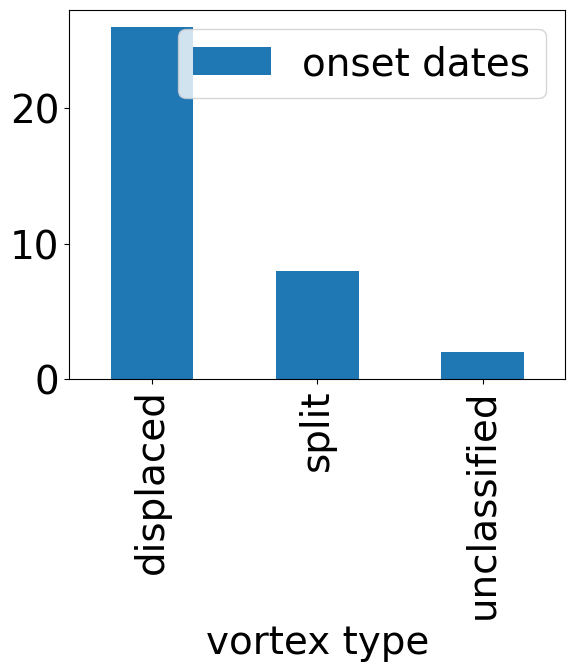

In [24]:
model_SSWs.groupby('vortex type').count().plot.bar()

<Axes: xlabel='vortex type'>

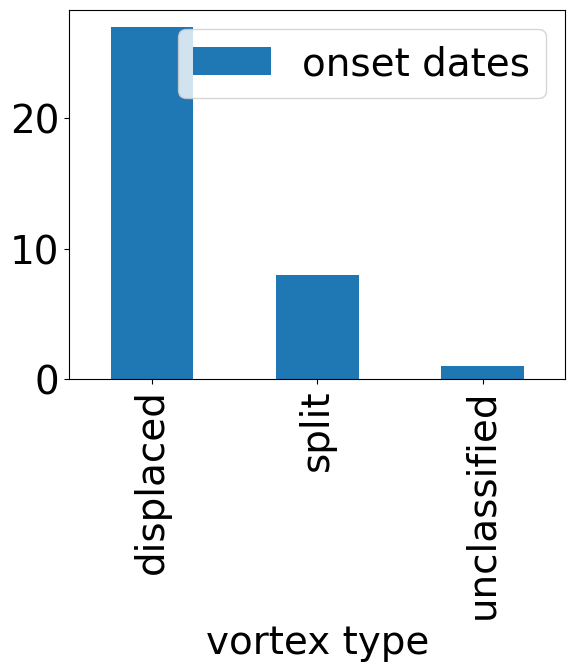

In [12]:
model_SSWs.groupby('vortex type').count().plot.bar()

# Modes calculation

In [5]:
def mode_func(aspect, latcent):
    #for latcent, cube the values to transform the distribution
    latcent3=np.power(latcent,3)
    #fit Gaussian distribution and use KS test for fit
    dist=getattr(stats,'norm')
    parameters=dist.fit(latcent3)
    (mean,SD)=parameters
    ks_stat,ks_pval=stats.kstest(latcent3,"norm",parameters)
    # convert latitude back (cube root)
    mode=np.power(mean,1/3)

    print('latcent mode:',mode)
    print('norm KS statistic and p value:',ks_stat,ks_pval)

    #fit GEV to aspect data
    dist2=getattr(stats,'genextreme')
    parameters=dist2.fit(aspect)
    (shape,location,scale)=parameters
    ks_stat_GEV,ks_pval_GEV = stats.kstest(aspect,"genextreme",parameters)

    print('location:', location)
    print(' GEV KS statistic and p value:',ks_stat_GEV,ks_pval_GEV)

    #aspect mode calculated according to Seviour et al. 2016 (S16)
    asp_params=stats.genextreme.fit(aspect)
    asp_pdf=stats.genextreme.pdf(aspect,asp_params[0],loc=asp_params[1],scale=asp_params[2])
    index=np.argmax(asp_pdf)
    max_asp_S16=aspect[index]

    print ('S16 aspect:',max_asp_S16)

    #kde alternative
    # aspect
    min_val=1
    max_val=int(np.round(np.max(aspect))+1)
    
    divs=(max_val-min_val)*100
    
    asp_xs=np.linspace(min_val,max_val,divs)
    asp_density=stats.gaussian_kde(aspect)
    asp_ys=asp_density(asp_xs)
    index=np.argmax(asp_ys)
    max_asp_kde=asp_xs[index]

    #latcent
    min1=int(np.round(np.min(latcent))-1)
    max1=90
    divs1=(max1-min1)*100

    lat_xs=np.linspace(min1,max1,divs1)
    lat_density=stats.gaussian_kde(latcent)
    lat_ys=lat_density(lat_xs)
    index1=np.argmax(lat_ys)
    max_lat_kde=lat_xs[index1]

    print ('kde aspect:',max_asp_kde)
    print ('kde latcent:',max_lat_kde)
    
    return max_asp_S16,mode

def diff_list(x, wo_x):
    return list(set(x) - set(wo_x))

def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "ns"

In [29]:
for model in ['MPI-ESM1-2-LR-all-from1920']:#model_ls[:]:
    print(model)

    filename2 = filepaths2[-1]
    moments = xr.open_dataset(filename2,use_cftime=True).sel(**time_dict).sel(plev = 1000)
    #aspect = moments['aspect_ratio']
    #latcent = moments['centroid_latitude']

    mode_aspect_ls = []
    mode_latcent_ls = []
    for ens in sorted(moments.ens.values):  
        print(ens)
        moments_ens = moments.sel(ens = ens)
        
        aspect = moments_ens['aspect_ratio']
        latcent =  moments_ens['centroid_latitude']
        
        aspect=aspect[np.logical_not(np.isnan(aspect))]
        aspect=aspect[aspect < float('+inf')]
        aspect=aspect[aspect < 100.0]
        latcent=latcent[np.logical_not(np.isnan(latcent))]
        latcent=latcent[latcent < float('+inf')]        
        
        mode_aspect, mode_latcent = mode_func(aspect.values, latcent.values)
        mode_aspect_ls.append(xr.DataArray([mode_aspect], coords = [('ens', [ens])]))
        mode_latcent_ls.append(xr.DataArray([mode_latcent], coords = [('ens', [ens])]))
        print()
        
    
    mode_aspect_da = xr.concat(mode_aspect_ls,dim='ens')
    mode_aspect_da.name = 'mode_aspect'
    mode_latcent_da = xr.concat(mode_latcent_ls,dim='ens')
    mode_latcent_da.name = 'mode_latcent'  
    
    ds_mode = xr.merge([mode_aspect_da, mode_latcent_da])
    ds_mode.to_netcdf(f'{out_dir}{model}_modes_nc')
    #sys.exit()

MPI-ESM1-2-LR-all-from1920
r10i1p1f1
latcent mode: 76.49230061372738
norm KS statistic and p value: 0.01406994724084143 0.23394146032402385
location: 1.4097658707820204
 GEV KS statistic and p value: 0.018487307153103982 0.04953463566585303
S16 aspect: 1.3444061083047645
kde aspect: 1.3802535023348899
kde latcent: 76.1167713421726

r11i1p1f1
latcent mode: 76.21137574810423
norm KS statistic and p value: 0.025259775584691613 0.00214648284326812
location: 1.401039300559674
 GEV KS statistic and p value: 0.025675531242773775 0.0017111428202814887
S16 aspect: 1.339099777843787
kde aspect: 1.340309372156506
kde latcent: 76.44677304120029

r12i1p1f1
latcent mode: 76.67593729442314
norm KS statistic and p value: 0.020763921900857296 0.018866459402990855
location: 1.3996708022442559
 GEV KS statistic and p value: 0.015616213915372601 0.14262829883529382
S16 aspect: 1.3380883653547393
kde aspect: 1.3505007153075823
kde latcent: 76.12669683257919

r13i1p1f1
latcent mode: 76.16258990367525
norm K

# Visualization

In [25]:
model_ls_new = [
    'CNRM-CM6-1', 'MPI-ESM1-2-HR', 
    'MPI-ESM1-2-LR', 'MPI-ESM1-2-LR-all', 'MPI-ESM1-2-LR-all-from1920', 'UKESM1-0-LL','MIROC6',
    'INM-CM5-0','IPSL-CM6A-LR','CESM2-LE', 'CanESM5', 'ERA5',
]
model_ls_new = [
    'CanESM2','CanESM5','CESM2-LE','CNRM-CM6-1','INM-CM5-0',
    'IPSL-CM6A-LR','MIROC6','UKESM1-0-LL','MPI-ESM1-2-HR',
    'MPI-ESM1-2-LR-all-from1920','ERA5'
]

CanESM2
CanESM5
CESM2-LE
CNRM-CM6-1
INM-CM5-0
IPSL-CM6A-LR
MIROC6
UKESM1-0-LL
MPI-ESM1-2-HR
MPI-ESM1-2-LR-all-from1920
ERA5


Text(0, 0.5, 'SSW frequency per decade')

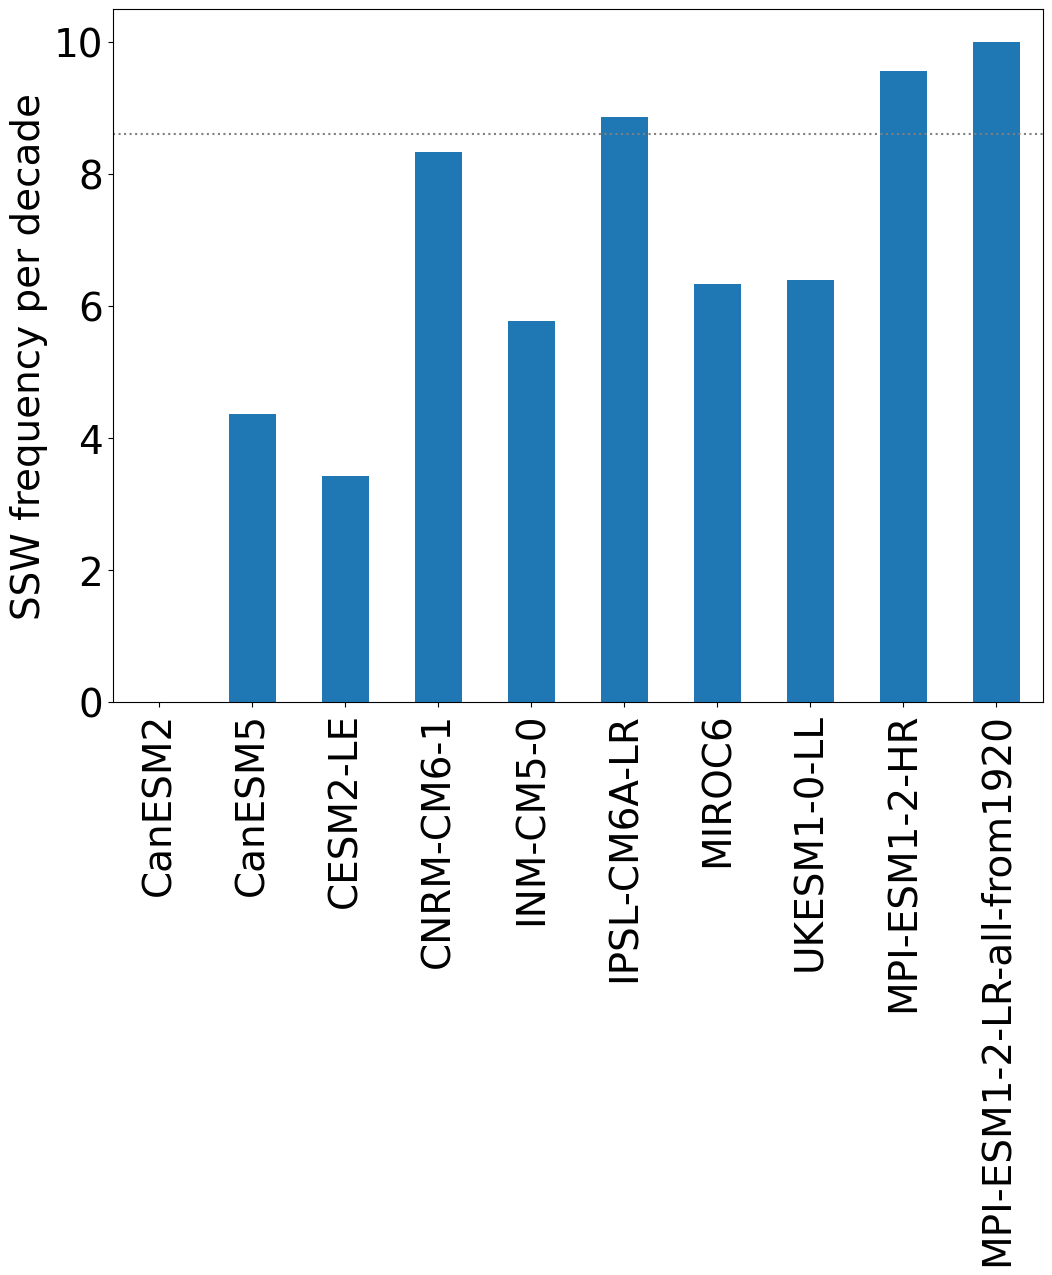

In [26]:
# df_g = []
how = ['split','displaced','unclassified']
ny = 36 # between 1979 and 2014
out_dir = './SSWs_stats/'

total_ls = []
#for model_i, (model, color) in enumerate(zip(model_ls_new, color_ls)):
for model_i, model in enumerate(model_ls_new):
    print(model)
    if model != 'ERA5':
        infiles = glob.glob(f'{out_dir}{model}_*.csv')
        n_files = len(infiles)
        if n_files == 0:
            total = np.nan
        else:
            df = pd.concat(map(pd.read_csv, infiles))
            total = df.groupby('vortex type').count().loc[:,'onset dates'].sum()/ny/n_files*10
            
        total_ls.append(total)
    else:
        df = pd.read_csv(f'{out_dir}{model}.csv')
        total_era_t = df.groupby('vortex type').count().loc[:,'onset dates'].sum()/ny*10
   #{f'{model}':total})
    #df_g = df.groupby('vortex type').count().loc[how,'onset dates']/36/n_files
    #df_g_ls.append(df_g)
    #sys.exit()
df_total = pd.DataFrame(total_ls, index = model_ls_new[:-1], columns = ['SSWs per dec'])
df_total.plot.bar(figsize = (12,9), legend = False)
plt.axhline(total_era_t,c='gray', ls = ':')
plt.ylabel('SSW frequency per decade')

0 CanESM2
1 CanESM5
35 35
2 CESM2-LE
49 49
3 CNRM-CM6-1
20 16
4 INM-CM5-0
10 10
5 IPSL-CM6A-LR
31 31
6 MIROC6
10 10
7 UKESM1-0-LL
7 7
8 MPI-ESM1-2-HR
10 10
9 MPI-ESM1-2-LR-all-from1920
50 50
10 ERA5
2.5


Text(0, 0.5, 'split frequency per decade')

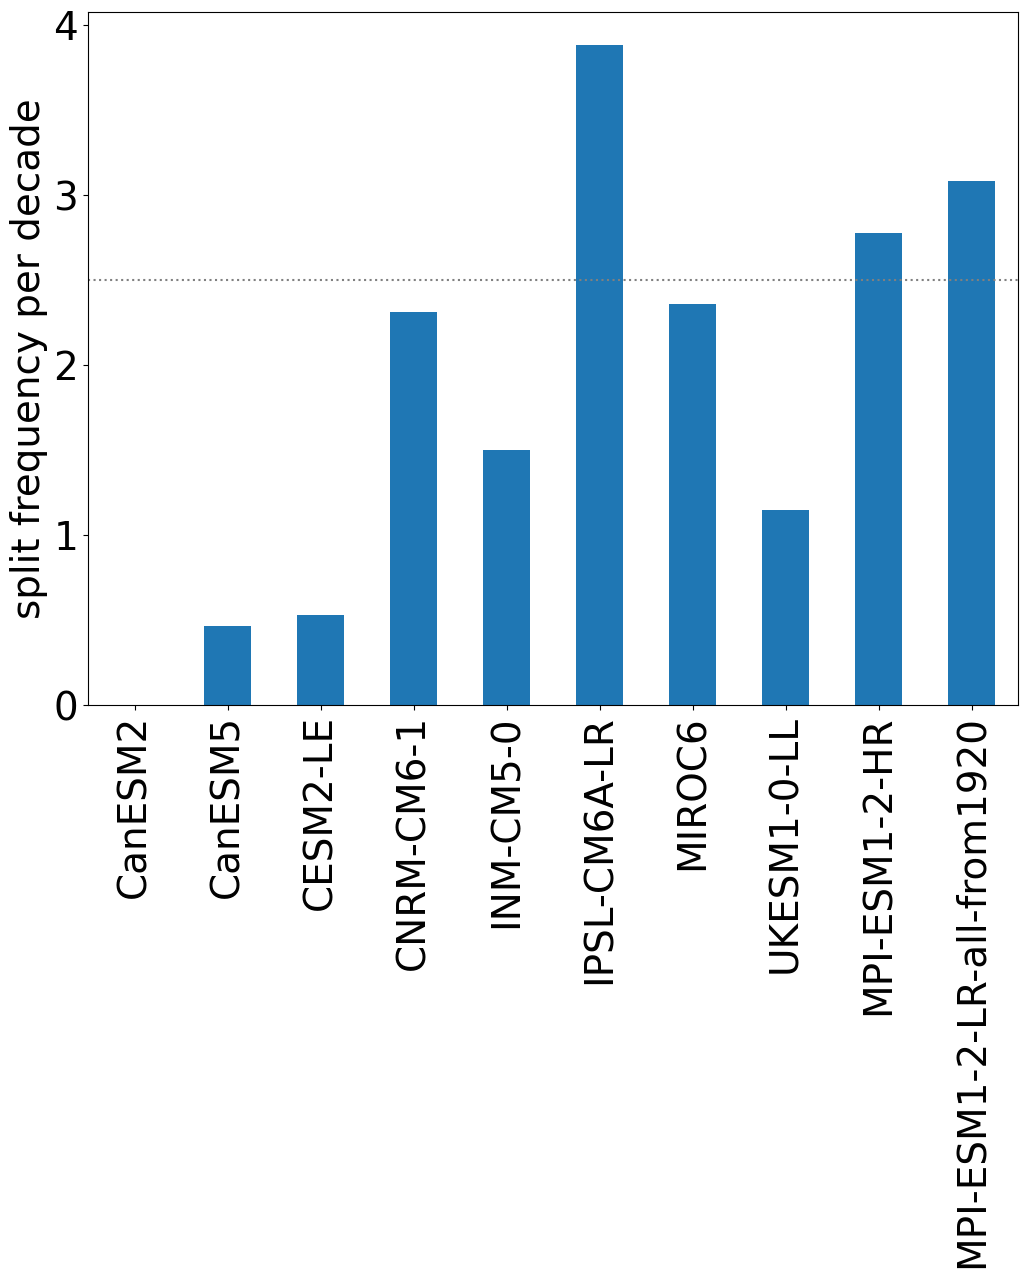

In [31]:
df_g = []
how = ['split','displaced','unclassified']
ny = 36 # between 1979 and 2014

index = 0

total_ls = []
#for model_i, (model, color) in enumerate(zip(model_ls_new, color_ls)):
for model_i, model, in enumerate(model_ls_new):
    print(model_i,model)
    if model != 'ERA5':
        infiles = glob.glob(f'{out_dir}{model}_*.csv')
        n_files = len(infiles)
        if n_files == 0:
            total = np.nan
        else:
            df = pd.concat(map(pd.read_csv, infiles))
            df_g_count = df.groupby('vortex type').count()

            anti_mask = ~np.isin(df_g_count.index, ['displaced', 'unclassified', 'split'])
            anti_mask_len = np.count_nonzero(anti_mask)
            nf = n_files-anti_mask_len
            print(n_files, nf)
            total = df_g_count.loc[how[index],'onset dates'].sum()/ny/nf*10
            
        total_ls.append(total)
    else:
        df = pd.read_csv(f'{out_dir}{model}.csv')
        total_era_s = df.groupby('vortex type').count().loc[how[index],'onset dates'].sum()/ny*10
        print(total_era_s)
        
   #{f'{model}':total})
    #df_g = df.groupby('vortex type').count().loc[how,'onset dates']/36/n_files
    #df_g_ls.append(df_g)
    #sys.exit()
df_split = pd.DataFrame(total_ls, index = model_ls_new[:-1], columns = [f'{how[index]}s per dec'])
df_split.plot.bar(figsize = (12,9), legend = False)
plt.axhline(total_era_s,c='gray', ls = ':')
plt.ylabel('split frequency per decade')

CanESM2
CanESM5
35 35
CESM2-LE
49 49
CNRM-CM6-1
20 16
INM-CM5-0
10 10
IPSL-CM6A-LR
31 31
MIROC6
10 10
UKESM1-0-LL
7 7
MPI-ESM1-2-HR
10 10
MPI-ESM1-2-LR-all-from1920
50 50
ERA5


Text(0, 0.5, 'displ. frequency per decade')

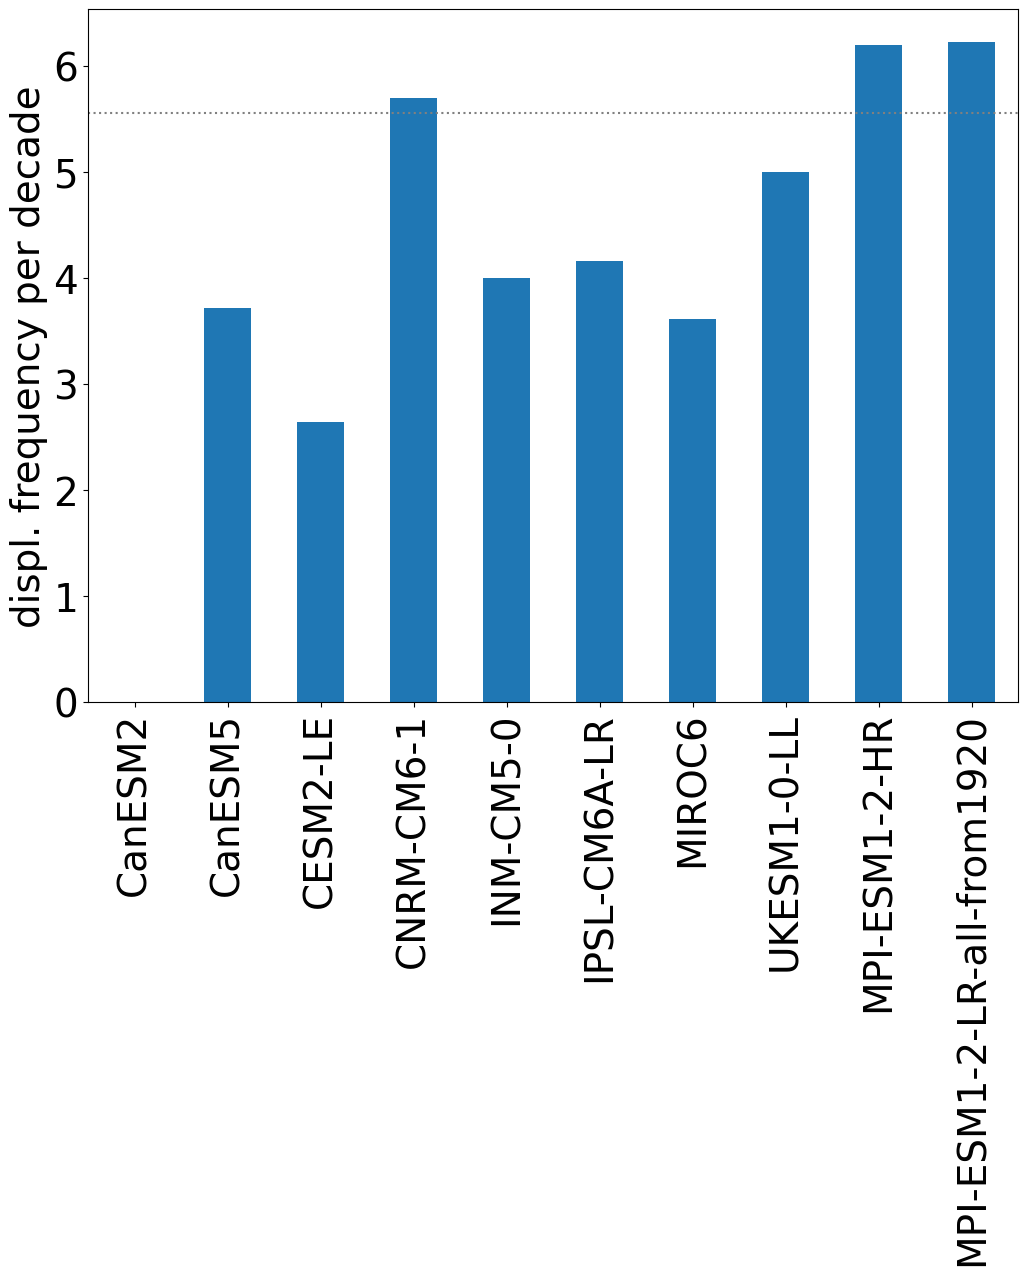

In [28]:
df_g = []
how = ['split','displaced','unclassified']
ny = 36 # between 1979 and 2014

index = 1

total_ls = []
#for model_i, (model, color) in enumerate(zip(model_ls_new, color_ls)):
for model_i, model, in enumerate(model_ls_new):
    print(model)
    if model != 'ERA5':
        infiles = glob.glob(f'{out_dir}{model}_*.csv')
        n_files = len(infiles)
        if n_files == 0:
            total = np.nan
        else:
        #print(n_files)
            df = pd.concat(map(pd.read_csv, infiles))
            df_g_count = df.groupby('vortex type').count()

            anti_mask = ~np.isin(df_g_count.index, ['displaced', 'unclassified', 'split'])
            anti_mask_len = np.count_nonzero(anti_mask)
            nf = n_files-anti_mask_len
            print(n_files, nf)
            total = df_g_count.loc[how[index],'onset dates'].sum()/ny/nf*10
            
        total_ls.append(total)
    else:
        df = pd.read_csv(f'{out_dir}{model}.csv')
        total_era_d = df.groupby('vortex type').count().loc[how[index],'onset dates'].sum()/ny*10
    #{f'{model}':total})
    #df_g = df.groupby('vortex type').count().loc[how,'onset dates']/36/n_files
    #df_g_ls.append(df_g)
    #sys.exit()
df_displ = pd.DataFrame(total_ls, index = model_ls_new[:-1], columns = [f'{how[index]}s per dec'])
df_displ.plot.bar(figsize = (12,9), legend = False)
plt.axhline(total_era_d,c='gray', ls = ':')
plt.ylabel('displ. frequency per decade')

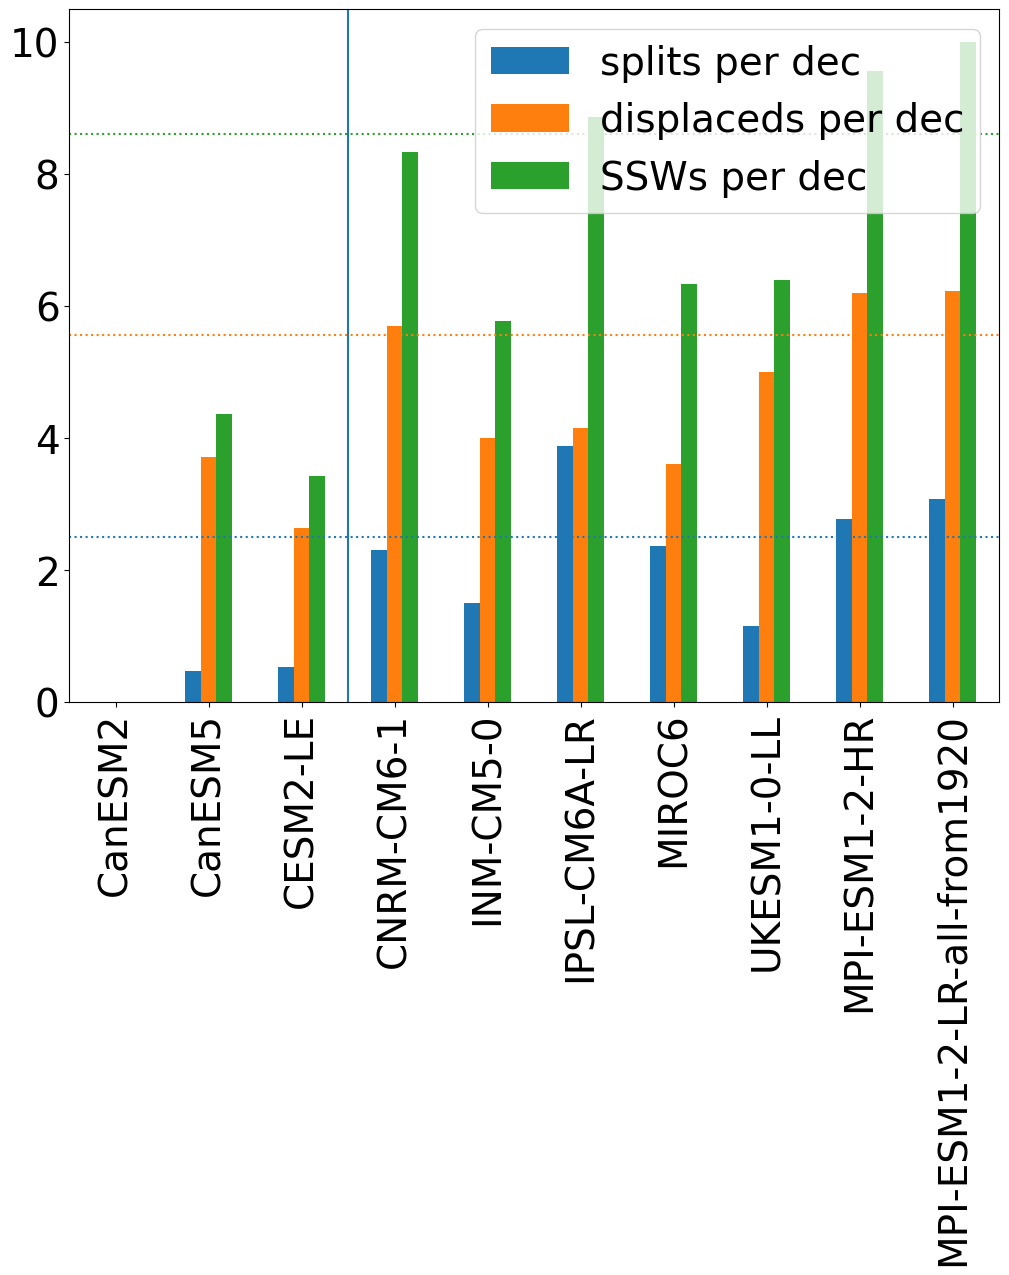

In [36]:
df_ssw_all = pd.concat([df_split,df_displ,df_total], axis = 1)
#_, ax = plt.subplots(figsize = (12,9))
df_ssw_all.plot.bar(stacked = False, figsize = (12,9))
#df_ssw_all['SSWs per dec'].plot.bar(ax = ax, color = 'C2')

#df_ssw_all['splits per dec'].plot.bar(ax = ax, color = 'C0')
#df_ssw_all['displaceds per dec'].plot.bar(ax = ax, color = 'C1')
plt.axhline(total_era_s,c='C0', ls = ':')
plt.axhline(total_era_d,c='C1', ls = ':')
plt.axhline(total_era_t,c='C2', ls = ':')
plt.axvline(2.5)

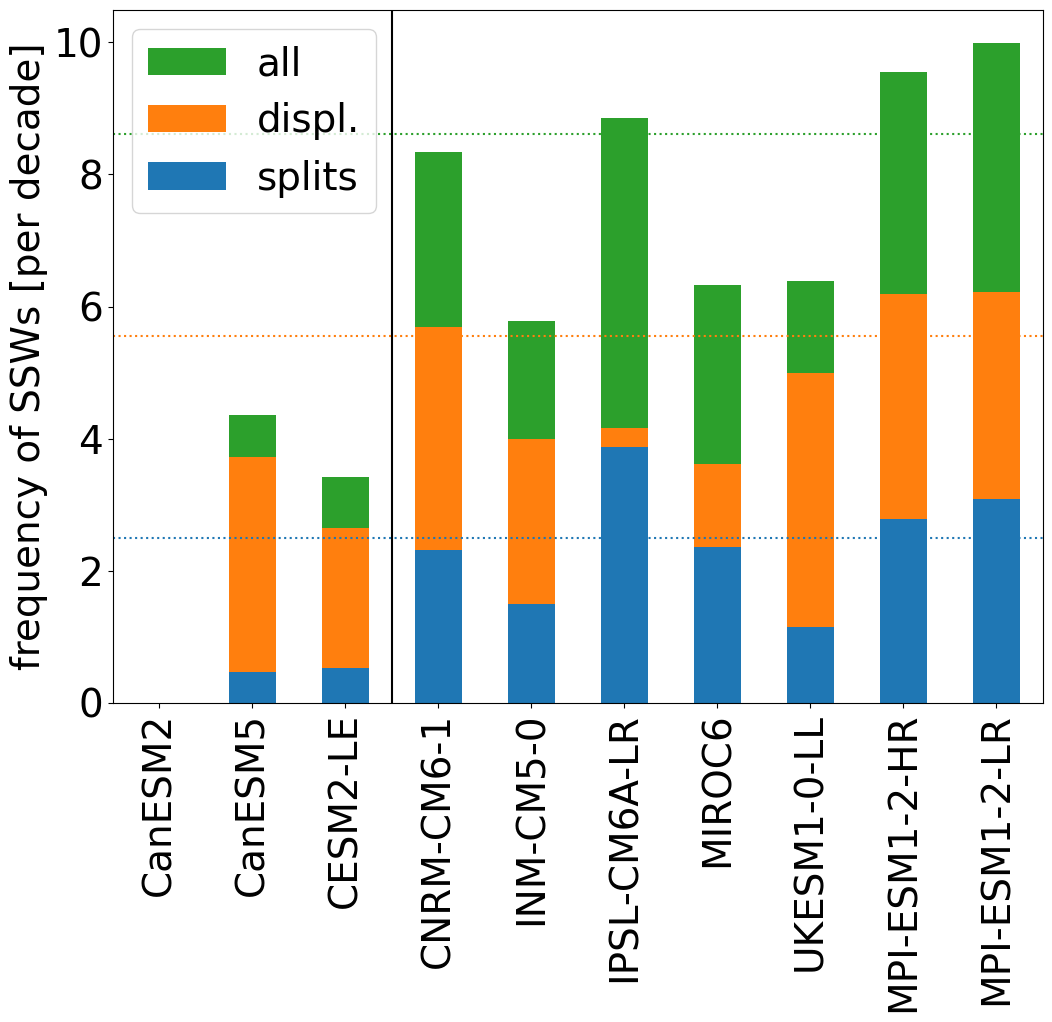

In [59]:
df_ssw_all = pd.concat([df_split,df_displ,df_total], axis = 1)
_, ax = plt.subplots(figsize = (12,9))
#df_ssw_all.plot.bar(stacked = False, figsize = (12,9))
df_ssw_all['SSWs per dec'].plot.bar(ax = ax, color = 'C2', label = 'all')
df_ssw_all['displaceds per dec'].plot.bar(ax = ax, color = 'C1', label = 'displ.')
df_ssw_all['splits per dec'].plot.bar(ax = ax, color = 'C0', label = 'splits')
plt.axhline(total_era_s,c='C0', ls = ':')
plt.axhline(total_era_d,c='C1', ls = ':')
plt.axhline(total_era_t,c='C2', ls = ':')
plt.axvline(2.5, c = 'k')
ax.legend()
ax.set_ylabel('frequency of SSWs [per decade]')
labels = ax.get_xticklabels()
labels[-1] = 'MPI-ESM1-2-LR'
ax.set_xticklabels(labels)
plt.savefig('SSW_frequency_bar_plot.pdf',bbox_inches='tight')

In [26]:
# 
# 
model_ls = [
    'CanESM2','CanESM5','CESM2-LE','CNRM-CM6-1','INM-CM5-0',
    'IPSL-CM6A-LR','MIROC6','UKESM1-0-LL','MPI-ESM1-2-HR',
    'MPI-ESM1-2-LR'
]
out_dir = './SSWs_stats/'
index = 1
how = ['split','displaced','unclassified']
ny = 36 # between 1979 and 2014

total_ls = []
for i,model in enumerate(model_ls):
    print(model)
    if model != 'ERA5':
        if model == 'MPI-ESM1-2-LR':
            infiles = glob.glob(f'{out_dir}{model}_r*i1*.csv')#r*i*p1f*
        else:
            infiles = glob.glob(f'{out_dir}{model}_*.csv')#r*i*p1f*
        n_files = len(infiles)
        print(n_files)
        try:
            df = pd.concat(map(pd.read_csv, infiles))
            total = df.groupby('vortex type').count().loc[how[index],'onset dates'].sum()/ny/n_files*10
        except:
            total = 0
            pass
    else:
        df = pd.read_csv(f'{out_dir}{model}.csv')
        total = df.groupby('vortex type').count().loc[how[index],'onset dates'].sum()/ny*10
    total_ls.append(total)


CanESM2
0
CanESM5
35
CESM2-LE
49
CNRM-CM6-1
20
INM-CM5-0
10
IPSL-CM6A-LR
31
MIROC6
10
UKESM1-0-LL
7
MPI-ESM1-2-HR
10
MPI-ESM1-2-LR
30


CanESM2
0
CanESM5
35
CESM2-LE
49
CNRM-CM6-1
20
INM-CM5-0
10
IPSL-CM6A-LR
31
MIROC6
10
UKESM1-0-LL
7
MPI-ESM1-2-HR
10
MPI-ESM1-2-LR
30


Text(0.5, 1.0, 'Split events')

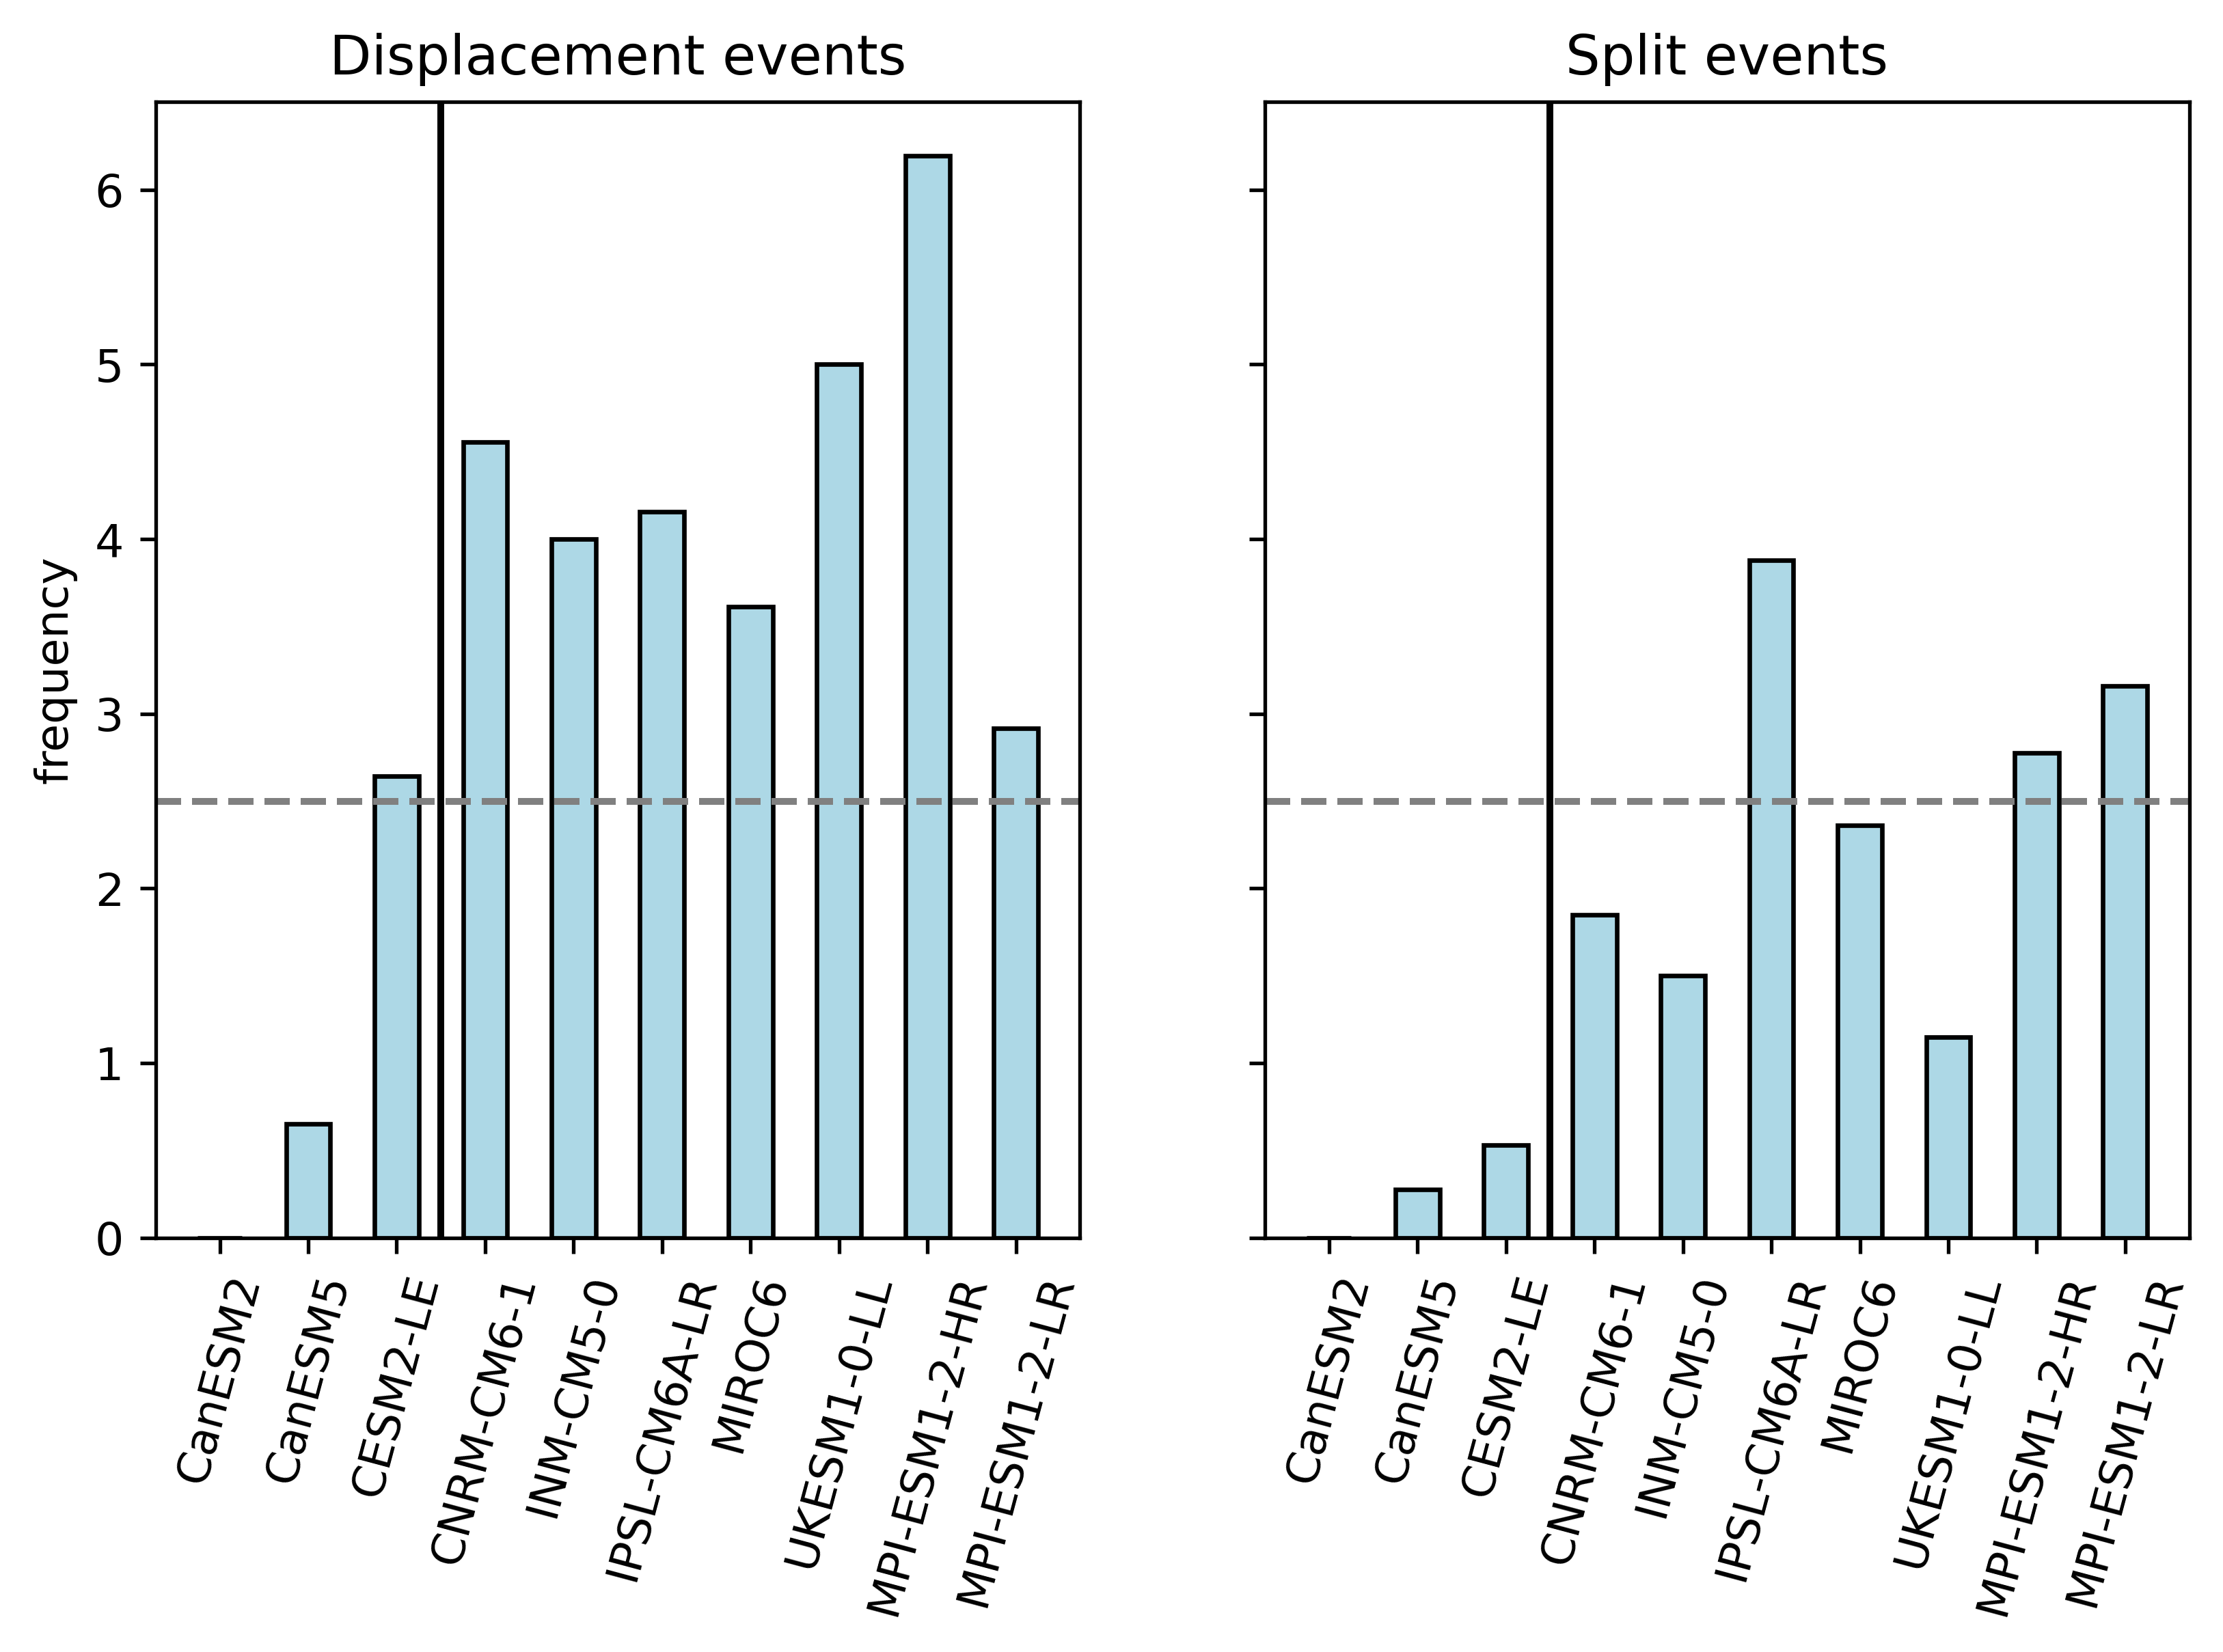

In [27]:
width = 0.5
ind=np.arange(len(model_ls))
fig, axs=plt.subplots(1,2,sharey=True,dpi=480,figsize=(8,4.5))
for i in ind:
    axs[0].bar(i,total_ls[i],width,color='lightblue',edgecolor='black')
    #axs[0].errorbar(i,area_displacements[i],yerr=[[err_locs_disp[i][0]],[err_locs_disp[i][1]]],
    #                ecolor='black',capsize=3,fmt='none')

axs[0].xaxis.set_major_locator(FixedLocator(ind))
axs[0].set_xticklabels(model_ls,rotation=75)
axs[0].axhline(total_era,color='grey',linestyle='--')
axs[0].axvline(2.5,color='black',linestyle='-')
axs[0].set_ylabel('frequency')
axs[0].set_title('Displacement events')

index = 0
total_ls = []
for i,model in enumerate(model_ls):
    print(model)
    if model != 'ERA5':
        if model == 'MPI-ESM1-2-LR':
            infiles = glob.glob(f'{out_dir}{model}_r*i1*.csv')#r*i*p1f*
        else:
            infiles = glob.glob(f'{out_dir}{model}_*.csv')#r*i*p1f*
        n_files = len(infiles)
        print(n_files)
        try:
            df = pd.concat(map(pd.read_csv, infiles))
            total = df.groupby('vortex type').count().loc[how[index],'onset dates'].sum()/ny/n_files*10
            #std = 
        except:
            total = 0
            pass

        
    else:
        df = pd.read_csv(f'{out_dir}{model}.csv')
        total = df.groupby('vortex type').count().loc[how[index],'onset dates'].sum()/ny*10
    total_ls.append(total)
    
df_era = pd.read_csv(f'{out_dir}ERA5.csv')
total_era = df_era.groupby('vortex type').count().loc[how[index],'onset dates'].sum()/ny*10


for i in ind:
    axs[1].bar(i,total_ls[i],width,color='lightblue',edgecolor='black')
    #axs[0].errorbar(i,area_displacements[i],yerr=[[err_locs_disp[i][0]],[err_locs_disp[i][1]]],
    #                ecolor='black',capsize=3,fmt='none')

axs[1].xaxis.set_major_locator(FixedLocator(ind))
axs[1].set_xticklabels(model_ls,rotation=75)
axs[1].axhline(total_era,color='grey',linestyle='--')
axs[1].axvline(2.5,color='black',linestyle='-')
#axs[0].set_ylabel('frequency')
axs[1].set_title('Split events')


## Splits

In [19]:
plt.rcParams.update({'font.size': 28, "contour.linewidth": 4})


In [39]:
model_ls_new

['CNRM-CM6-1',
 'MPI-ESM1-2-HR',
 'MPI-ESM1-2-LR',
 'MPI-ESM1-2-LR-all',
 'UKESM1-0-LL',
 'MIROC6',
 'INM-CM5-0',
 'IPSL-CM6A-LR',
 'ERA5',
 'CESM2-LE',
 'CanESM5']

MPI-ESM1-2-LR
MPI-ESM1-2-HR
MPI-ESM1-2-LR-all-from1920


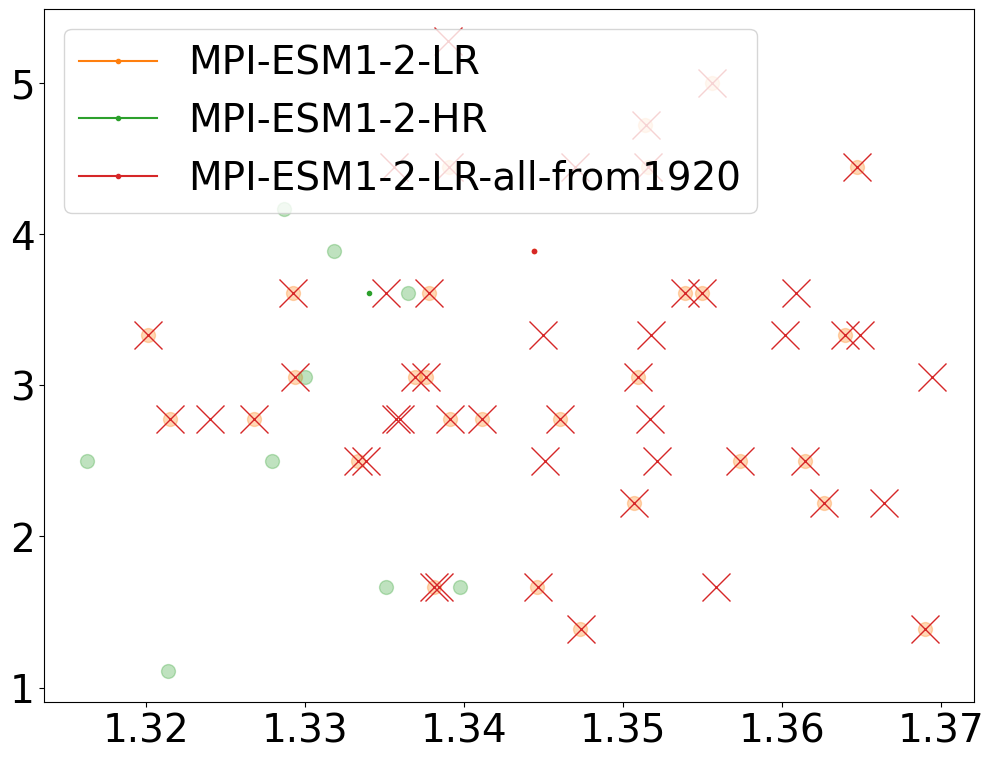

In [146]:
color_ls = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','k']
ny = 36#np.unique(u10.time.dt.year).shape[0]
ms = 20
wo_outliers = False
how_many = 2 # how many last models (outliers) to remove from regression
ols_calc = True
wls_calc = False

fig, ax = plt.subplots(figsize = (12,9))

model_mode_ls = []
model_ns_ls = []
model_ns_var_ls = []
model_ls_new2 = [
    'MPI-ESM1-2-LR',
 'MPI-ESM1-2-HR',
 'MPI-ESM1-2-LR-all-from1920',
 #'ERA5'
]
for model, color in zip(model_ls_new2, color_ls):
    print(model)
    ds_mode = xr.open_dataset(f'{out_dir}{model}_modes_nc', engine = 'netcdf4')   
    
    i = 0
   
    if model in ['ERA5']:
        split_dates=np.load(f'{out_dir}{model}_split_dates_all.npy',allow_pickle=True)
        ns = len(split_dates)/ny*10.
        mode = ds_mode['mode_aspect'].values
        ax.plot(mode,ns, marker = 'o', color = 'k', label = model, ms = ms)
        ax.axhline(ns,color = 'k', ls = ':' )
        ax.axvline(mode,color = 'k', ls = ':')
    else:
        ns_ls = []
        mode_ls = []
        for ens in ds_mode.ens.values:
            try:
                split_dates=np.load(f'{out_dir}{model}_{ens}_split_dates_all.npy',allow_pickle=True)
                i+=1
                ns = len(split_dates)/ny*10.
                mode = ds_mode['mode_aspect'].sel(ens = ens).values
                if i == 1:
                    ax.plot(mode,ns, marker = '.', color = color, label = model)
                elif  model == 'MPI-ESM1-2-LR-all-from1920':
                     ax.plot(mode,ns, marker = 'x', color = color, ms = 20)
                else:
                    ax.plot(mode,ns, marker = '.', color = color, ms = 20, alpha = 0.3)
                ns_ls.append(ns)
                mode_ls.append(mode)
            except:
                pass
        #sys.exit()
        
plt.legend()

MPI-ESM1-2-LR
MPI-ESM1-2-HR
MPI-ESM1-2-LR-all


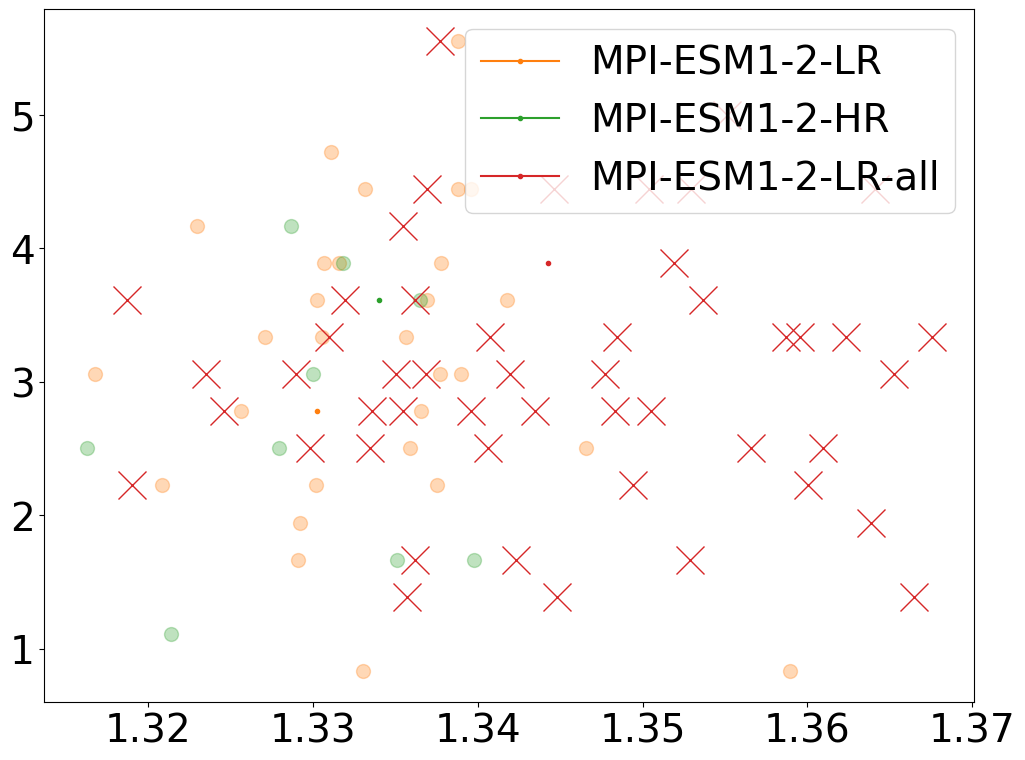

In [111]:
color_ls = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','k']
ny = 36#np.unique(u10.time.dt.year).shape[0]
ms = 20
wo_outliers = False
how_many = 2 # how many last models (outliers) to remove from regression
ols_calc = True
wls_calc = False

fig, ax = plt.subplots(figsize = (12,9))

model_mode_ls = []
model_ns_ls = []
model_ns_var_ls = []
model_ls_new2 = [
    'MPI-ESM1-2-LR',
 'MPI-ESM1-2-HR',
 'MPI-ESM1-2-LR-all',
 #'ERA5'
]
for model, color in zip(model_ls_new2, color_ls):
    print(model)
    ds_mode = xr.open_dataset(f'{out_dir}{model}_modes_nc', engine = 'netcdf4')   
    
    i = 0
   
    if model in ['ERA5']:
        split_dates=np.load(f'{out_dir}{model}_split_dates_all.npy',allow_pickle=True)
        ns = len(split_dates)/ny*10.
        mode = ds_mode['mode_aspect'].values
        ax.plot(mode,ns, marker = 'o', color = 'k', label = model, ms = ms)
        ax.axhline(ns,color = 'k', ls = ':' )
        ax.axvline(mode,color = 'k', ls = ':')
    else:
        ns_ls = []
        mode_ls = []
        for ens in ds_mode.ens.values:
            try:
                split_dates=np.load(f'{out_dir}{model}_{ens}_split_dates_all.npy',allow_pickle=True)
                i+=1
                ns = len(split_dates)/ny*10.
                mode = ds_mode['mode_aspect'].sel(ens = ens).values
                if i == 1:
                    ax.plot(mode,ns, marker = '.', color = color, label = model)
                elif  model == 'MPI-ESM1-2-LR-all':
                     ax.plot(mode,ns, marker = 'x', color = color, ms = 20)
                else:
                    ax.plot(mode,ns, marker = '.', color = color, ms = 20, alpha = 0.3)
                ns_ls.append(ns)
                mode_ls.append(mode)
            except:
                pass
        #sys.exit()
        
plt.legend()

MPI-ESM1-2-LR
MPI-ESM1-2-HR
MPI-ESM1-2-LR-all-from1920
ERA5


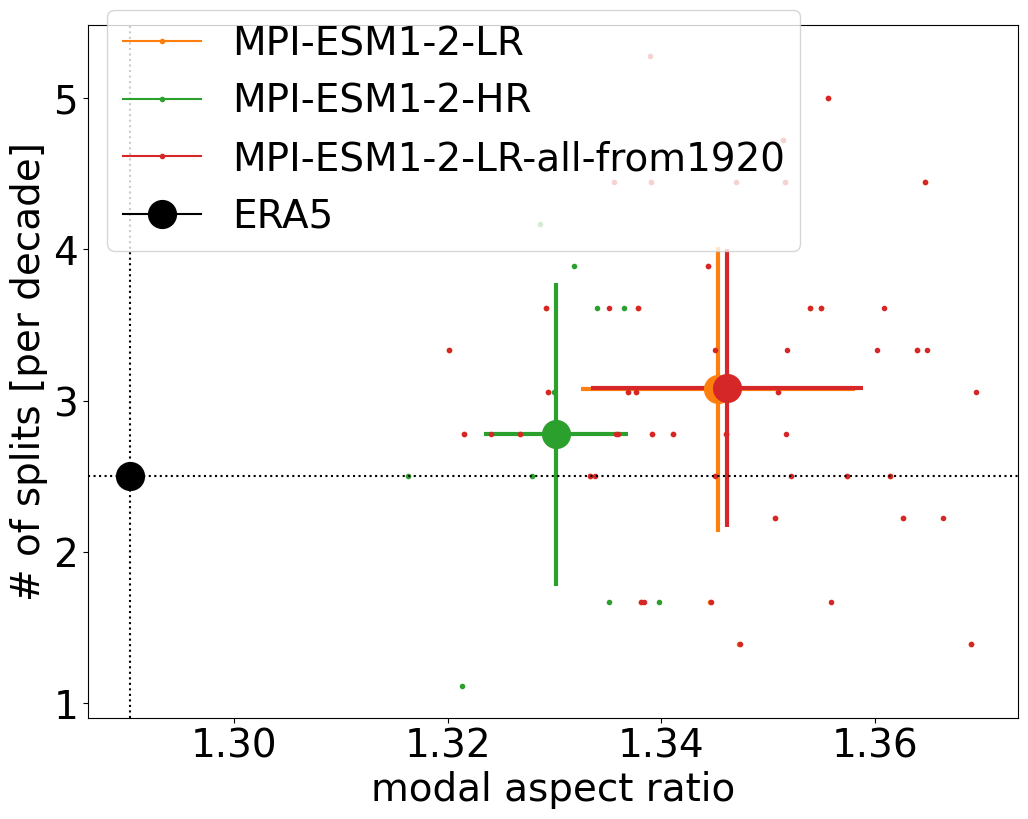

In [40]:
color_ls = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','k']
ny = 36#np.unique(u10.time.dt.year).shape[0]
ms = 20
wo_outliers = False
how_many = 2 # how many last models (outliers) to remove from regression
ols_calc = True
wls_calc = False

fig, ax = plt.subplots(figsize = (12,9))

model_mode_ls = []
model_ns_ls = []
model_ns_var_ls = []
model_ls_new2 = [
    'MPI-ESM1-2-LR',
 'MPI-ESM1-2-HR',
 'MPI-ESM1-2-LR-all-from1920',
 'ERA5'
]
for model, color in zip(model_ls_new2, color_ls):
    print(model)
    ds_mode = xr.open_dataset(f'{out_dir}{model}_modes_nc', engine = 'netcdf4')   
    
    i = 0
   
    if model in ['ERA5']:
        split_dates=np.load(f'{out_dir}{model}_split_dates_all.npy',allow_pickle=True)
        ns = len(split_dates)/ny*10.
        mode = ds_mode['mode_aspect'].values
        ax.plot(mode,ns, marker = 'o', color = 'k', label = model, ms = ms)
        ax.axhline(ns,color = 'k', ls = ':' )
        ax.axvline(mode,color = 'k', ls = ':')
    else:
        ns_ls = []
        mode_ls = []
        for ens in ds_mode.ens.values:
            try:
                split_dates=np.load(f'{out_dir}{model}_{ens}_split_dates_all.npy',allow_pickle=True)
                i+=1
                ns = len(split_dates)/ny*10.
                mode = ds_mode['mode_aspect'].sel(ens = ens).values
                if i == 1:
                    ax.plot(mode,ns, marker = '.', color = color, label = model)
                else:
                    ax.plot(mode,ns, marker = '.', color = color)
                ns_ls.append(ns)
                mode_ls.append(mode)
            except:
                pass
        #sys.exit()
        
        x = np.mean(mode_ls)
        x_std = np.std(mode_ls)
        y= np.mean(ns_ls)
        y_std= np.std(ns_ls)
        model_mode_ls.append(xr.DataArray([x], coords = [('model', [model])]))
        model_ns_ls.append(xr.DataArray([y], coords = [('model', [model])]))
        model_ns_var_ls.append(xr.DataArray([y_std], coords = [('model', [model])]))
        #ax.plot(x,y, marker = 'o', color = color,ms = ms)
        ax.errorbar(
            x, y, yerr=y_std, xerr=x_std,
            ms = ms, color = color,
            marker='o',
            lw = 3,
        )

model_mode_da = xr.concat(model_mode_ls, dim = 'model')
model_ns_da = xr.concat(model_ns_ls, dim = 'model')
model_ns_var_da = xr.concat(model_ns_var_ls, dim = 'model')

x = model_mode_da.values
x1 = sm.add_constant(np.column_stack(x).T) #  necessary, negative intercept is unphysical (frequancy of events cannot be <0)
y = model_ns_da.values
order = np.argsort(model_mode_da)


# OLS
if ols_calc:
    model_OLS = sm.OLS(y, x1)
    results = model_OLS.fit()
    #ax.plot(x[order],results.fittedvalues[order], label = 'OLS', color = 'C0', lw = 3)
    pred_ols = results.get_prediction()
    iv_l = pred_ols.summary_frame()["obs_ci_lower"]
    iv_u = pred_ols.summary_frame()["obs_ci_upper"]
    #plt.plot(x[order],iv_u[order], color = 'C0', ls="--", lw = 3)
    #plt.plot(x[order],iv_l[order], color = 'C0',ls="--", lw = 3)      
    #print(results.summary().as_latex())
    r2 = results.rsquared_adj.round(2)
    pv = convert_pvalue_to_asterisks(results.pvalues[-1])#.round(3)
    #ax.text(1.3,4.5,r"R$^{2}_{adj}$="+f"{r2} ({pv})", color = 'C0')
    #ax.text(1.2,4.5,r"R$^{2}_{adj}$="+f"{r2}", color = 'C0')

if wls_calc:
    model_WLS = sm.WLS(y, x1, weights=model_ns_var_da.values)
    results = model_WLS.fit()
    ax.plot(x[order],results.fittedvalues[order], label = 'WLS', color = 'C0', lw = 3)
    pred_ols = results.get_prediction()
    iv_l = pred_ols.summary_frame()["obs_ci_lower"]
    iv_u = pred_ols.summary_frame()["obs_ci_upper"]
    plt.plot(x[order],iv_u[order], color = 'C0', ls="--", lw = 3)
    plt.plot(x[order],iv_l[order], color = 'C0',ls="--", lw = 3)     
    ax.text(1.325,6,r"R$^{2}_{adj}$="+f"{r2} ({pv})", color = 'C0')
    print(results.summary())

if wo_outliers:
    model_OLS = sm.OLS(y[:-how_many], x1[:-how_many])
    results = model_OLS.fit()
    print()
    print('outliers')
    print(results.summary().as_latex())
    order = np.argsort(model_mode_da[:-how_many])
    ax.plot(x[:-how_many][order],results.fittedvalues[order], label = f'OLS wo {how_many}', color = 'gray', lw = 3)
    
    pred_ols = results.get_prediction()
    iv_l = pred_ols.summary_frame()["obs_ci_lower"]
    iv_u = pred_ols.summary_frame()["obs_ci_upper"]
    plt.plot(x[:-how_many][order],iv_u[order], color = 'gray', ls="--", lw = 3)
    plt.plot(x[:-how_many][order],iv_l[order], color = 'gray',ls="--", lw = 3)     
    
    r2 = results.rsquared_adj.round(2)
    pv = convert_pvalue_to_asterisks(results.pvalues[1])#.round(3)
    ax.text(1.2,5.5,r"R$^{2}_{adj}$="+f"{r2} ({pv})", color = 'gray')


# Theil-Sen
res = stats.theilslopes(y,x)
#ax.plot(x, res[1] + res[0] * x, 'r-', label = 'Theil-Sen')



ax.legend(loc='upper left', bbox_to_anchor=(0., 1.05))
plt.ylabel('# of splits [per decade]')
plt.xlabel('modal aspect ratio')
plt.savefig('split_frequency_vs_mode_MPI-ESMs.pdf',bbox_inches='tight')

In [4]:
out_dir

'./SSWs_stats/'

CNRM-CM6-1
MPI-ESM1-2-HR
MPI-ESM1-2-LR-all-from1920
UKESM1-0-LL
MIROC6
INM-CM5-0
IPSL-CM6A-LR
ERA5
CESM2-LE
CanESM5

outliers
\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &        y         & \textbf{  R-squared:         } &     0.508   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.409   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     5.157   \\
\textbf{Date:}             & Fri, 19 Jan 2024 & \textbf{  Prob (F-statistic):} &   0.0724    \\
\textbf{Time:}             &     18:27:10     & \textbf{  Log-Likelihood:    } &   -6.3918   \\
\textbf{No. Observations:} &           7      & \textbf{  AIC:               } &     16.78   \\
\textbf{Df Residuals:}     &           5      & \textbf{  BIC:               } &     16.68   \\
\textbf{Df Model:}         &           1      & \textbf{                     } &             \\
\textbf{Covariance Type:}  &    nonrobust     & \textbf{    

/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


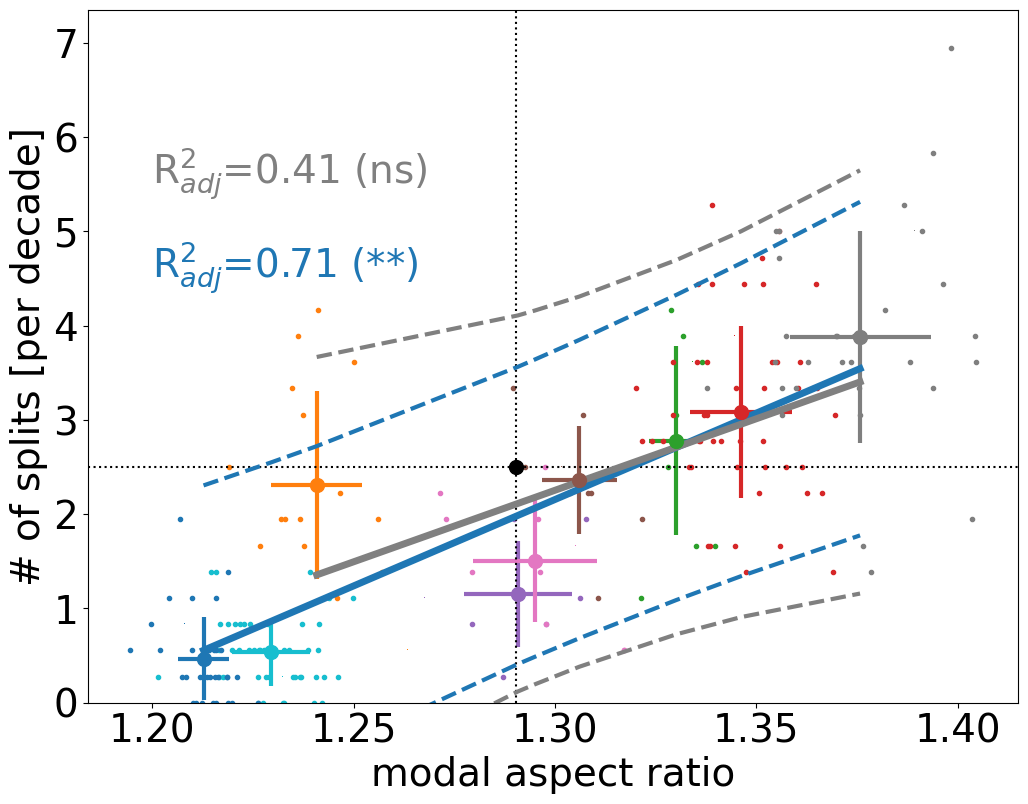

In [6]:
color_ls = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','k']
ny = 36#np.unique(u10.time.dt.year).shape[0]
ms = 10
wo_outliers = True
how_many = 2 # how many last models (outliers) to remove from regression
ols_calc = True
wls_calc = False

fig, ax = plt.subplots(figsize = (12,9))

model_mode_ls = []
model_ns_ls = []
model_ns_var_ls = []
model_ls_new2 = ['CNRM-CM6-1',
 'MPI-ESM1-2-HR',
 #'MPI-ESM1-2-LR',
 'MPI-ESM1-2-LR-all-from1920',
 'UKESM1-0-LL',
 'MIROC6',
 'INM-CM5-0',
 'IPSL-CM6A-LR',
 'ERA5',
 'CESM2-LE',
 'CanESM5']
for model, color in zip(model_ls_new2, color_ls):
    print(model)
    ds_mode = xr.open_dataset(f'{out_dir}{model}_modes_nc', engine = 'netcdf4')   
    
    i = 0
   
    if model in ['ERA5']:
        split_dates=np.load(f'{out_dir}{model}_split_dates_all.npy',allow_pickle=True)
        ns = len(split_dates)/ny*10.
        mode = ds_mode['mode_aspect'].values
        ax.plot(mode,ns, marker = 'o', color = 'k', label = model, ms = ms)
        ax.axhline(ns,color = 'k', ls = ':' )
        ax.axvline(mode,color = 'k', ls = ':')
    else:
        ns_ls = []
        mode_ls = []
        for ens in ds_mode.ens.values:
            try:
                split_dates=np.load(f'{out_dir}{model}_{ens}_split_dates_all.npy',allow_pickle=True)
                i+=1
                ns = len(split_dates)/ny*10.
                mode = ds_mode['mode_aspect'].sel(ens = ens).values
                if i == 1:
                    if model ==  'MPI-ESM1-2-LR-all-from1920':
                        label =  'MPI-ESM1-2-LR'
                    else:
                        label = model
                    ax.plot(mode,ns, marker = ',', color = color, label = label)#, ms = ms)
                    #ax.plot(mode,ns, marker = '.', color = color, label = model)
                else:
                    ax.plot(mode,ns, marker = '.', color = color)
                ns_ls.append(ns)
                mode_ls.append(mode)
            except:
                pass
        #sys.exit()
        
        x = np.mean(mode_ls)
        x_std = np.std(mode_ls)
        y= np.mean(ns_ls)
        y_std= np.std(ns_ls)
        model_mode_ls.append(xr.DataArray([x], coords = [('model', [model])]))
        model_ns_ls.append(xr.DataArray([y], coords = [('model', [model])]))
        model_ns_var_ls.append(xr.DataArray([y_std], coords = [('model', [model])]))
        ax.errorbar(
            x, y, yerr=y_std, xerr=x_std,
            ms = ms, color = color,
            marker='o',
            lw = 3,
        )

        #ax.plot(x,y, marker = 'o', color = color,ms = ms)
        


model_mode_da = xr.concat(model_mode_ls, dim = 'model')
model_ns_da = xr.concat(model_ns_ls, dim = 'model')
model_ns_var_da = xr.concat(model_ns_var_ls, dim = 'model')

x = model_mode_da.values
x1 = sm.add_constant(np.column_stack(x).T) #  necessary, negative intercept is unphysical (frequancy of events cannot be <0)
y = model_ns_da.values
order = np.argsort(model_mode_da)


# OLS
if ols_calc:
    model_OLS = sm.OLS(y, x1)
    results = model_OLS.fit()
    ax.plot(x[order],results.fittedvalues[order], label = 'OLS', color = 'C0', lw = 5)
    pred_ols = results.get_prediction()
    iv_l = pred_ols.summary_frame()["obs_ci_lower"]
    iv_u = pred_ols.summary_frame()["obs_ci_upper"]
    plt.plot(x[order],iv_u[order], color = 'C0', ls="--", lw = 3)
    plt.plot(x[order],iv_l[order], color = 'C0',ls="--", lw = 3)      
    #print(results.summary().as_latex())
    r2 = results.rsquared_adj.round(2)
    pv = convert_pvalue_to_asterisks(results.pvalues[-1])#.round(3)
    ax.text(1.2,4.5,r"R$^{2}_{adj}$="+f"{r2} ({pv})", color = 'C0')
    #ax.text(1.2,4.5,r"R$^{2}_{adj}$="+f"{r2}", color = 'C0')

if wls_calc:
    model_WLS = sm.WLS(y, x1, weights=model_ns_var_da.values)
    results = model_WLS.fit()
    ax.plot(x[order],results.fittedvalues[order], label = 'WLS', color = 'C0', lw = 3)
    pred_ols = results.get_prediction()
    iv_l = pred_ols.summary_frame()["obs_ci_lower"]
    iv_u = pred_ols.summary_frame()["obs_ci_upper"]
    plt.plot(x[order],iv_u[order], color = 'C0', ls="--", lw = 3)
    plt.plot(x[order],iv_l[order], color = 'C0',ls="--", lw = 3)     
    ax.text(1.225,6,r"R$^{2}_{adj}$="+f"{r2} ({pv})", color = 'C0')
    print(results.summary())

if wo_outliers:
    model_OLS = sm.OLS(y[:-how_many], x1[:-how_many])
    results = model_OLS.fit()
    print()
    print('outliers')
    print(results.summary().as_latex())
    order = np.argsort(model_mode_da[:-how_many])
    ax.plot(
        x[:-how_many][order],results.fittedvalues[order], 
        label = f'OLS wo {how_many}', color = 'gray', lw = 5)
    
    pred_ols = results.get_prediction()
    iv_l = pred_ols.summary_frame()["obs_ci_lower"]
    iv_u = pred_ols.summary_frame()["obs_ci_upper"]
    plt.plot(x[:-how_many][order],iv_u[order], color = 'gray', ls="--", lw = 3)
    plt.plot(x[:-how_many][order],iv_l[order], color = 'gray',ls="--", lw = 3)     
    
    r2 = results.rsquared_adj.round(2)
    pv = convert_pvalue_to_asterisks(results.pvalues[1])#.round(3)
    ax.text(1.2,5.5,r"R$^{2}_{adj}$="+f"{r2} ({pv})", color = 'gray')


# Theil-Sen
res = stats.theilslopes(y,x)
#ax.plot(x, res[1] + res[0] * x, 'r-', label = 'Theil-Sen')


ax.set_ylim(bottom = 0)
#ax.legend(loc='upper right', bbox_to_anchor=(1.6, 1.05))
plt.ylabel('# of splits [per decade]')
plt.xlabel('modal aspect ratio')
plt.savefig('split_frequency_vs_mode_with-compl-MPI-ESM-LR2.pdf',bbox_inches='tight')

In [43]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [58]:
model_OLS = sm.OLS(y, x1)
results = model_OLS.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     19.64
Date:                Thu, 04 May 2023   Prob (F-statistic):            0.00304
Time:                        13:12:34   Log-Likelihood:                -7.7065
No. Observations:                   9   AIC:                             19.41
Df Residuals:                       7   BIC:                             19.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.2107      5.245     -4.044      0.0

/home/b/b381258/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.670
Model:                            WLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     14.21
Date:                Thu, 04 May 2023   Prob (F-statistic):            0.00699
Time:                        13:14:06   Log-Likelihood:                -8.3903
No. Observations:                   9   AIC:                             20.78
Df Residuals:                       7   BIC:                             21.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.3654      5.328     -3.259      0.0

/home/b/b381258/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


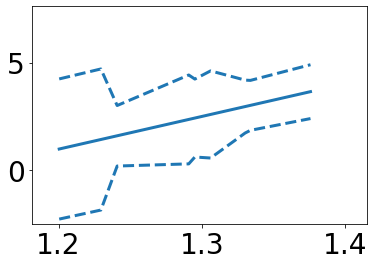

In [63]:
model_WLS = sm.WLS(y, x1, weights=model_ns_var_da.values)
results = model_WLS.fit()
plt.plot(x[order],results.fittedvalues[order], label = 'WLS', color = 'C0', lw = 3)
plt.xlim(ax.get_xlim())
plt.ylim(ax.get_ylim())
pred_ols = results.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]
plt.plot(x[order],iv_u[order], color = 'C0', ls="--", lw = 3)
plt.plot(x[order],iv_l[order], color = 'C0',ls="--", lw = 3)     
#ax.text(1.325,6,r"R$^{2}$="+f"{r2} ({pv})", color = 'C0')
print(results.summary())

In [22]:
model_WLS = sm.WLS(y, x1, weights=model_ns_var_da.values)
results = model_WLS.fit()
results.summary()

/home/b/b381258/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.670
Model:                            WLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     14.21
Date:                Thu, 04 May 2023   Prob (F-statistic):            0.00699
Time:                        11:57:04   Log-Likelihood:                -8.3903
No. Observations:                   9   AIC:                             20.78
Df Residuals:                       7   BIC:                             21.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.3654      5.328     -3.259      0.014     -29.965      -4.766
x1            15.2741      4.052      3.769      0.007       5.692      24.856
==============================================================================
Omnibus:                        0.922   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.631   Jarque-Bera (JB):                0.439
Skew:                           0.498   Prob(JB):                        0.803
Kurtosis:                       2.575   Cond. No.                         55.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
model_WLS = sm.WLS(y, x, weights=model_ns_var_da.values)
results = model_WLS.fit()
results.summary()

/home/b/b381258/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 WLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.914
Model:                            WLS   Adj. R-squared (uncentered):              0.904
Method:                 Least Squares   F-statistic:                              85.33
Date:                Wed, 03 May 2023   Prob (F-statistic):                    1.53e-05
Time:                        12:03:48   Log-Likelihood:                         -12.545
No. Observations:                   9   AIC:                                      27.09
Df Residuals:                       8   BIC:                                      27.29
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.0770      0.225      9.237      0.000       1.559       2.596
==============================================================================
Omnibus:                        3.239   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.198   Jarque-Bera (JB):                1.363
Skew:                           0.951   Prob(JB):                        0.506
Kurtosis:                       2.875   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### without "outliers"

MIROC6
CNRM-CM6-1
INM-CM5-0
MPI-ESM1-2-HR
MPI-ESM1-2-LR
ERA5
UKESM1-0-LL
IPSL-CM6A-LR


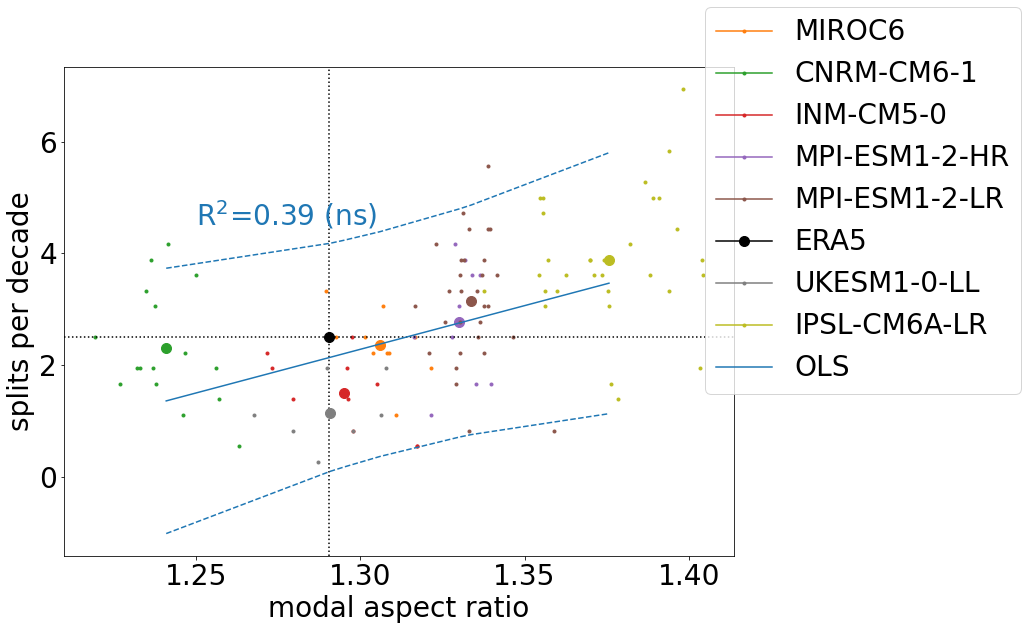

In [78]:
fig, ax = plt.subplots(figsize = (12,9))

model_ls_out=['CanESM5','CESM2-LE']#,'IPSL-CM6A-LR'] # ,

model_mode_ls = []
model_ns_ls = []
model_ns_var_ls = []
for model, color in zip(diff_list(model_ls_new, model_ls_out), color_ls):
    print(model)
    ds_mode = xr.open_dataset(f'{out_dir}{model}_modes_nc')   
    
    i = 0
   
    if model in ['ERA5']:
        split_dates=np.load(f'{out_dir}{model}_split_dates_all.npy',allow_pickle=True)
        ns = len(split_dates)/ny*10.
        mode = ds_mode['mode_aspect'].values
        ax.plot(mode,ns, marker = 'o', color = 'k', label = model, ms = ms)
        ax.axhline(ns,color = 'k', ls = ':' )
        ax.axvline(mode,color = 'k', ls = ':')
    else:
        ns_ls = []
        mode_ls = []
        for ens in ds_mode.ens.values:
            try:
                split_dates=np.load(f'{out_dir}{model}_{ens}_split_dates_all.npy',allow_pickle=True)
                i+=1
                ns = len(split_dates)/ny*10.
                mode = ds_mode['mode_aspect'].sel(ens = ens).values
                if i == 1:
                    ax.plot(mode,ns, marker = '.', color = color, label = model)
                else:
                    ax.plot(mode,ns, marker = '.', color = color)
                ns_ls.append(ns)
                mode_ls.append(mode)
            except:
                pass
        #sys.exit()
        
        x = np.mean(mode_ls)
        y= np.mean(ns_ls)
        y_var = np.var(ns_ls)
        model_mode_ls.append(xr.DataArray([x], coords = [('model', [model])]))
        model_ns_ls.append(xr.DataArray([y], coords = [('model', [model])]))
        model_ns_var_ls.append(xr.DataArray([y_var], coords = [('model', [model])]))
        ax.plot(x,y, marker = 'o', color = color,ms = ms)

model_mode_da = xr.concat(model_mode_ls, dim = 'model')
model_ns_da = xr.concat(model_ns_ls, dim = 'model')
model_ns_var_da = xr.concat(model_ns_var_ls, dim = 'model')
        
x = model_mode_da.values
x1 = sm.add_constant(np.column_stack(x).T)
y = model_ns_da.values
# OLS
model_OLS = sm.OLS(y, x1)
results = model_OLS.fit()
order = np.argsort(model_mode_da)
ax.plot(x[order],results.fittedvalues[order], label = 'OLS')
pred_ols = results.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]
plt.plot(x[order],iv_u[order], color = 'C0', ls="--")
plt.plot(x[order],iv_l[order], color = 'C0',ls="--")       
# Theil-Sen
res = stats.theilslopes(y,x)
#ax.plot(x, res[1] + res[0] * x, 'r-', label = 'Theil-Sen')

r2 = results.rsquared_adj.round(2)
pv = convert_pvalue_to_asterisks(results.pvalues[1])#.round(3)
ax.text(1.25,4.5,r"R$^{2}$="+f"{r2} ({pv})", color = 'C0')
ax.legend(loc='upper right', bbox_to_anchor=(1.45, 1.15))
plt.ylabel('splits per decade')
plt.xlabel('modal aspect ratio')
plt.savefig('split_frequency_vs_mode_wo-outliers.pdf',bbox_inches='tight')

In [79]:
results.summary()

/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     4.872
Date:                Thu, 04 May 2023   Prob (F-statistic):             0.0784
Time:                        14:27:16   Log-Likelihood:                -6.5587
No. Observations:                   7   AIC:                             17.12
Df Residuals:                       5   BIC:                             17.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.0035      9.270     -1.942      0.110     -41.833       5.826
x1            15.6078      7.071      2.207      0.078      -2.570      33.785
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.019
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.338
Skew:                          -0.230   Prob(JB):                        0.845
Kurtosis:                       2.027   Cond. No.                         69.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
model_WLS = sm.WLS(y, x1, weights=model_ns_var_da.values)
results = model_WLS.fit()
results.summary()

/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.282
Model:                            WLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     1.571
Date:                Wed, 03 May 2023   Prob (F-statistic):              0.278
Time:                        12:06:46   Log-Likelihood:                -5.0818
No. Observations:                   6   AIC:                             14.16
Df Residuals:                       4   BIC:                             13.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.0931      9.245     -0.984      0.381     -34.762      16.576
x1             8.8984      7.099      1.253      0.278     -10.813      28.610
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.716
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.610
Skew:                          -0.240   Prob(JB):                        0.737
Kurtosis:                       1.514   Cond. No.                         73.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Displacements

In [81]:
model_ls_new

['CNRM-CM6-1',
 'MPI-ESM1-2-HR',
 'MPI-ESM1-2-LR',
 'MPI-ESM1-2-LR-all',
 'UKESM1-0-LL',
 'MIROC6',
 'INM-CM5-0',
 'IPSL-CM6A-LR',
 'ERA5',
 'CESM2-LE',
 'CanESM5']

CNRM-CM6-1
MPI-ESM1-2-HR
MPI-ESM1-2-LR-all-from1920
UKESM1-0-LL
MIROC6
INM-CM5-0
IPSL-CM6A-LR
ERA5
CESM2-LE
CanESM5
\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &        y         & \textbf{  R-squared:         } &     0.604   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.548   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     10.68   \\
\textbf{Date:}             & Fri, 19 Jan 2024 & \textbf{  Prob (F-statistic):} &   0.0137    \\
\textbf{Time:}             &     18:31:19     & \textbf{  Log-Likelihood:    } &   -10.144   \\
\textbf{No. Observations:} &           9      & \textbf{  AIC:               } &     24.29   \\
\textbf{Df Residuals:}     &           7      & \textbf{  BIC:               } &     24.68   \\
\textbf{Df Model:}         &           1      & \textbf{                     } &             \\
\textbf{Covariance Type:}  &    nonrobust     & \textbf{              

/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


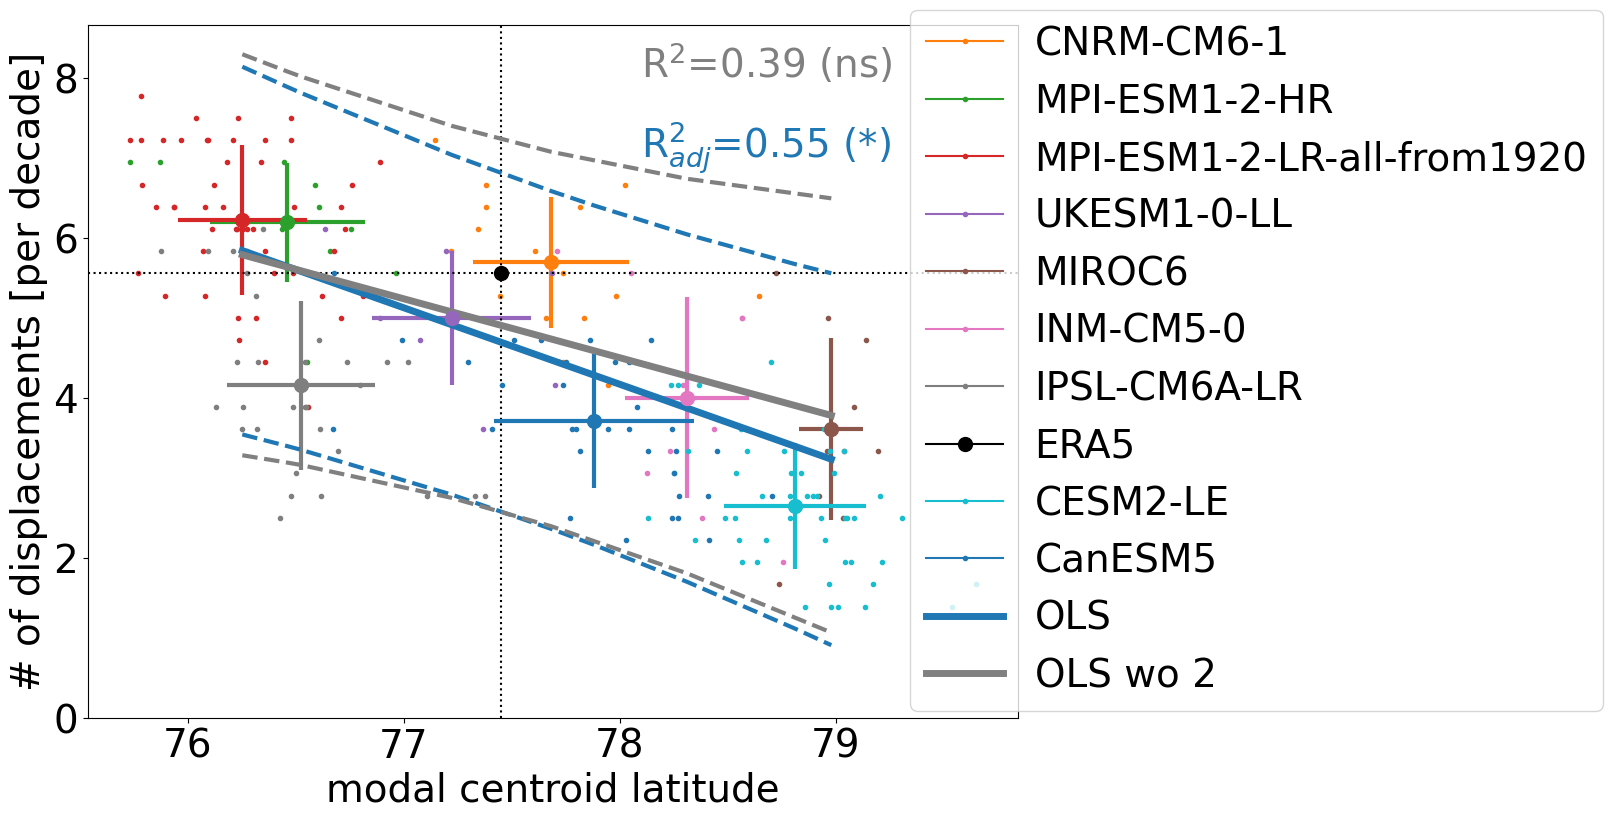

In [9]:
fig, ax = plt.subplots(figsize = (12,9))
wo_outliers = True

model_mode_ls = []
model_ns_ls = []
model_ns_var_ls = []
model_ls_new2 = ['CNRM-CM6-1',
 'MPI-ESM1-2-HR',
 #'MPI-ESM1-2-LR',
 'MPI-ESM1-2-LR-all-from1920',
 'UKESM1-0-LL',
 'MIROC6',
 'INM-CM5-0',
 'IPSL-CM6A-LR',
 'ERA5',
 'CESM2-LE',
 'CanESM5'
]
for model, color in zip(model_ls_new2, color_ls):
    print(model)
    ds_mode = xr.open_dataset(f'{out_dir}{model}_modes_nc')   
    
    i = 0
   
    if model in ['ERA5']:
        split_dates=np.load(f'{out_dir}{model}_disp_dates_all.npy',allow_pickle=True)
        ns = len(split_dates)/ny*10.
        mode = ds_mode['mode_latcent'].values
        ax.plot(mode,ns, marker = 'o', color = 'k', label = model, ms = ms)
        ax.axhline(ns,color = 'k', ls = ':' )
        ax.axvline(mode,color = 'k', ls = ':')
    else:
        ns_ls = []
        mode_ls = []
        for ens in ds_mode.ens.values:
            try:
                split_dates=np.load(f'{out_dir}{model}_{ens}_disp_dates_all.npy',allow_pickle=True)
                i+=1
                ns = len(split_dates)/ny*10.
                mode = ds_mode['mode_latcent'].sel(ens = ens).values
                if i == 1:
                    ax.plot(mode,ns, marker = '.', color = color, label = model)
                else:
                    ax.plot(mode,ns, marker = '.', color = color)
                ns_ls.append(ns)
                mode_ls.append(mode)
            except:
                pass
        #sys.exit()
        x = np.mean(mode_ls)
        x_std = np.std(mode_ls)
        y= np.mean(ns_ls)
        y_std = np.std(ns_ls)
        model_mode_ls.append(xr.DataArray([x], coords = [('model', [model])]))
        model_ns_ls.append(xr.DataArray([y], coords = [('model', [model])]))
        #model_ns_var_ls.append(xr.DataArray([y_var], coords = [('model', [model])]))
        #ax.plot(x,y, marker = 'o', color = color,ms = ms)
        ax.errorbar(
            x, y, yerr=y_std, xerr=x_std,
            ms = ms, color = color,
            marker='o',
            lw = 3,
        )

        

model_mode_da = xr.concat(model_mode_ls, dim = 'model')
model_ns_da = xr.concat(model_ns_ls, dim = 'model')
#model_ns_var_da = xr.concat(model_ns_var_ls, dim = 'model')

x = model_mode_da.values
x1 = sm.add_constant(np.column_stack(x).T) #  necessary, negative intercept is unphysical (frequancy of events cannot be <0)
y = model_ns_da.values
order = np.argsort(model_mode_da)


# OLS
if ols_calc:
    model_OLS = sm.OLS(y, x1)
    results = model_OLS.fit()
    ax.plot(x[order],results.fittedvalues[order], label = 'OLS', color = 'C0', lw = 5)
    pred_ols = results.get_prediction()
    iv_l = pred_ols.summary_frame()["obs_ci_lower"]
    iv_u = pred_ols.summary_frame()["obs_ci_upper"]
    plt.plot(x[order],iv_u[order], color = 'C0', ls="--", lw = 3)
    plt.plot(x[order],iv_l[order], color = 'C0',ls="--", lw = 3)      
    print(results.summary().as_latex())
    r2 = results.rsquared_adj.round(2)
    pv = convert_pvalue_to_asterisks(results.pvalues[-1])#.round(3)
    ax.text(78.1,7,r"R$^{2}_{adj}$="+f"{r2} ({pv})", color = 'C0')
    #ax.text(78.9,4.5,r"R$^{2}_{adj}$="+f"{r2}", color = 'C0')

if wls_calc:
    model_WLS = sm.WLS(y, x, weights=model_ns_var_da.values)
    results = model_WLS.fit()
    ax.plot(x[order],results.fittedvalues[order], label = 'WLS', color = 'C0', lw = 3)
    pred_ols = results.get_prediction()
    iv_l = pred_ols.summary_frame()["obs_ci_lower"]
    iv_u = pred_ols.summary_frame()["obs_ci_upper"]
    plt.plot(x[order],iv_u[order], color = 'C0', ls="--", lw = 3)
    plt.plot(x[order],iv_l[order], color = 'C0',ls="--", lw = 3)     
    #ax.text(78.5,7,r"R$^{2}$="+f"{r2} ({pv})", color = 'C0')
    ax.text(78.9,7.75,r"R$^{2}$="+f"{r2}", color = 'C0')
    print(results.summary())

if wo_outliers:
    model_OLS = sm.OLS(y[:-how_many], x1[:-how_many])
    results = model_OLS.fit()
    order = np.argsort(model_mode_da[:-how_many])
    ax.plot(
        x[:-how_many][order],results.fittedvalues[order], 
        label = f'OLS wo {how_many}', color = 'gray', lw = 5
    )
    
    pred_ols = results.get_prediction()
    iv_l = pred_ols.summary_frame()["obs_ci_lower"]
    iv_u = pred_ols.summary_frame()["obs_ci_upper"]
    plt.plot(x[:-how_many][order],iv_u[order], color = 'gray', ls="--", lw = 3)
    plt.plot(x[:-how_many][order],iv_l[order], color = 'gray',ls="--", lw = 3)     
    
    r2 = results.rsquared_adj.round(2)
    pv = convert_pvalue_to_asterisks(results.pvalues[1])#.round(3)
    ax.text(78.1,8,r"R$^{2}$="+f"{r2} ({pv})", color = 'gray')


# Theil-Sen
res = stats.theilslopes(y,x)
#ax.plot(x, res[1] + res[0] * x, 'r-', label = 'Theil-Sen')
ax.set_ylim(bottom = 0)
ax.legend(loc='upper right', bbox_to_anchor=(1.65, 1.05))
plt.ylabel('# of displacements [per decade]')
plt.xlabel('modal centroid latitude')
plt.savefig('displacement_frequency_vs_mode_with-compl-MPI-ESM-LR2.pdf',bbox_inches='tight')

MPI-ESM1-2-LR
r10i1p1f1
r11i1p1f1
r12i1p1f1
r13i1p1f1
r14i1p1f1
r15i1p1f1
r16i1p1f1
r17i1p1f1
r18i1p1f1
r19i1p1f1
r1i1p1f1
r20i1p1f1
r21i1p1f1
r22i1p1f1
r23i1p1f1
r24i1p1f1
r25i1p1f1
r26i1p1f1
r27i1p1f1
r28i1p1f1
r29i1p1f1
r2i1p1f1
r30i1p1f1
r3i1p1f1
r4i1p1f1
r5i1p1f1
r6i1p1f1
r7i1p1f1
r8i1p1f1
r9i1p1f1
MPI-ESM1-2-HR
r10i1p1f1
r1i1p1f1
r2i1p1f1
r3i1p1f1
r4i1p1f1
r5i1p1f1
r6i1p1f1
r7i1p1f1
r8i1p1f1
r9i1p1f1
MPI-ESM1-2-LR-all-from1920
r10i1p1f1
r11i1p1f1
r12i1p1f1
r13i1p1f1
r14i1p1f1
r15i1p1f1
r16i1p1f1
r17i1p1f1
r18i1p1f1
r19i1p1f1
r1i1p1f1
r20i1p1f1
r21i1p1f1
r22i1p1f1
r23i1p1f1
r24i1p1f1
r25i1p1f1
r26i1p1f1
r27i1p1f1
r28i1p1f1
r29i1p1f1
r2i1p1f1
r30i1p1f1
r31i1p1f1
r32i1p1f1
r33i1p1f1
r34i1p1f1
r35i1p1f1
r36i1p1f1
r37i1p1f1
r38i1p1f1
r39i1p1f1
r3i1p1f1
r40i1p1f1
r41i1p1f1
r42i1p1f1
r43i1p1f1
r44i1p1f1
r45i1p1f1
r46i1p1f1
r47i1p1f1
r48i1p1f1
r49i1p1f1
r4i1p1f1
r50i1p1f1
r5i1p1f1
r6i1p1f1
r7i1p1f1
r8i1p1f1
r9i1p1f1


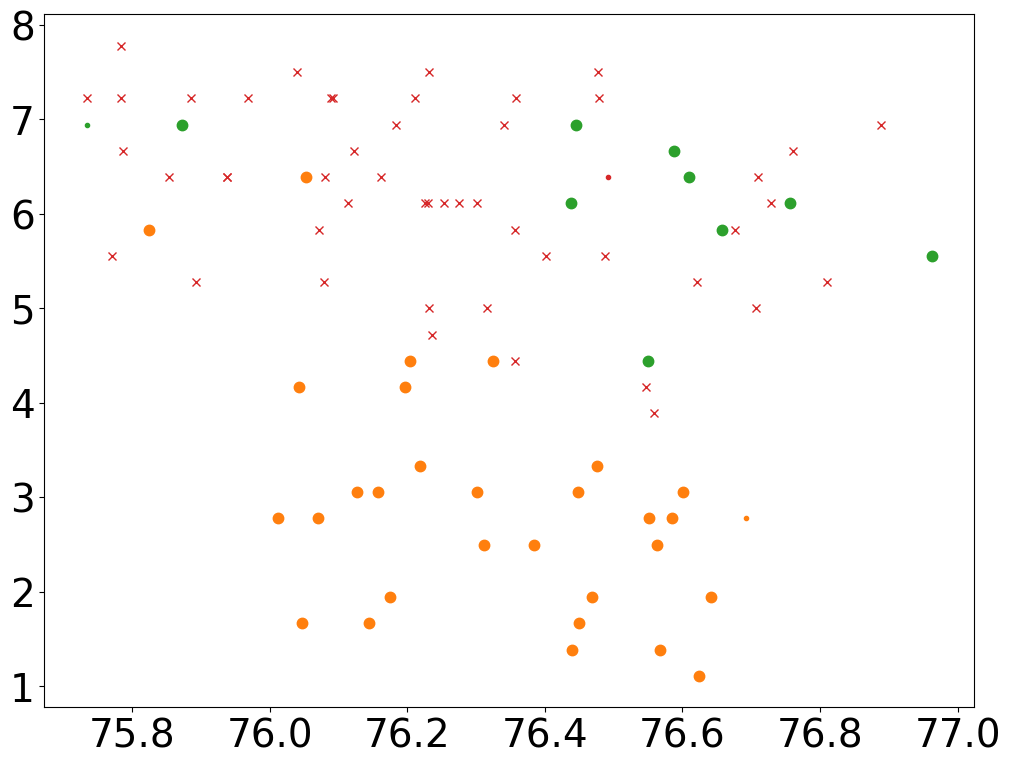

In [43]:
fig, ax = plt.subplots(figsize = (12,9))
wo_outliers = False

model_mode_ls = []
model_ns_ls = []
model_ns_var_ls = []
model_ls_new2 = [
    'MPI-ESM1-2-LR',
     'MPI-ESM1-2-HR', 
 'MPI-ESM1-2-LR-all-from1920',
]
for model, color in zip(model_ls_new2, color_ls):
    print(model)
    ds_mode = xr.open_dataset(f'{out_dir}{model}_modes_nc')   
    
    i = 0
   
    if model in ['ERA5']:
        split_dates=np.load(f'{out_dir}{model}_disp_dates_all.npy',allow_pickle=True)
        ns = len(split_dates)/ny*10.
        mode = ds_mode['mode_latcent'].values
        ax.plot(mode,ns, marker = 'o', color = 'k', label = model, ms = ms)
        ax.axhline(ns,color = 'k', ls = ':' )
        ax.axvline(mode,color = 'k', ls = ':')
    else:
        ns_ls = []
        mode_ls = []
        for ens in ds_mode.ens.values:
            print(ens)
            try:
                split_dates=np.load(f'{out_dir}{model}_{ens}_disp_dates_all.npy',allow_pickle=True)
                i+=1
                ns = len(split_dates)/ny*10.
                mode = ds_mode['mode_latcent'].sel(ens = ens).values
                if i == 1:
                    ax.plot(mode,ns, marker = '.', color = color, label = model)
                elif model == 'MPI-ESM1-2-LR-all-from1920':
                    ax.plot(mode,ns, marker = 'x', color = color)
                else:
                    ax.plot(mode,ns, marker = '.', color = color, ms = 15)
                ns_ls.append(ns)
                mode_ls.append(mode)
            except:
                pass
        #sys.exit()
        x = np.mean(mode_ls)
        x_std = np.std(mode_ls)
        y= np.mean(ns_ls)
        y_var = np.var(ns_ls)

MPI-ESM1-2-LR
r10i1p1f1
r11i1p1f1
r12i1p1f1
r13i1p1f1
r14i1p1f1
r15i1p1f1
r16i1p1f1
r17i1p1f1
r18i1p1f1
r19i1p1f1
r1i1p1f1
r20i1p1f1
r21i1p1f1
r22i1p1f1
r23i1p1f1
r24i1p1f1
r25i1p1f1
r26i1p1f1
r27i1p1f1
r28i1p1f1
r29i1p1f1
r2i1p1f1
r30i1p1f1
r3i1p1f1
r4i1p1f1
r5i1p1f1
r6i1p1f1
r7i1p1f1
r8i1p1f1
r9i1p1f1
MPI-ESM1-2-HR
r10i1p1f1
r1i1p1f1
r2i1p1f1
r3i1p1f1
r4i1p1f1
r5i1p1f1
r6i1p1f1
r7i1p1f1
r8i1p1f1
r9i1p1f1
MPI-ESM1-2-LR-all-from1920
r10i1p1f1
r11i1p1f1
r12i1p1f1
r13i1p1f1
r14i1p1f1
r15i1p1f1
r16i1p1f1
r17i1p1f1
r18i1p1f1
r19i1p1f1
r1i1p1f1
r20i1p1f1
r21i1p1f1
r22i1p1f1
r23i1p1f1
r24i1p1f1
r25i1p1f1
r26i1p1f1
r27i1p1f1
r28i1p1f1
r29i1p1f1
r2i1p1f1
r30i1p1f1
r31i1p1f1
r32i1p1f1
r33i1p1f1
r34i1p1f1
r35i1p1f1
r36i1p1f1
r37i1p1f1
r38i1p1f1
r39i1p1f1
r3i1p1f1
r40i1p1f1
r41i1p1f1
r42i1p1f1
r43i1p1f1
r44i1p1f1
r45i1p1f1
r46i1p1f1
r47i1p1f1
r48i1p1f1
r49i1p1f1
r4i1p1f1
r50i1p1f1
r5i1p1f1
r6i1p1f1
r7i1p1f1
r8i1p1f1
r9i1p1f1
ERA5


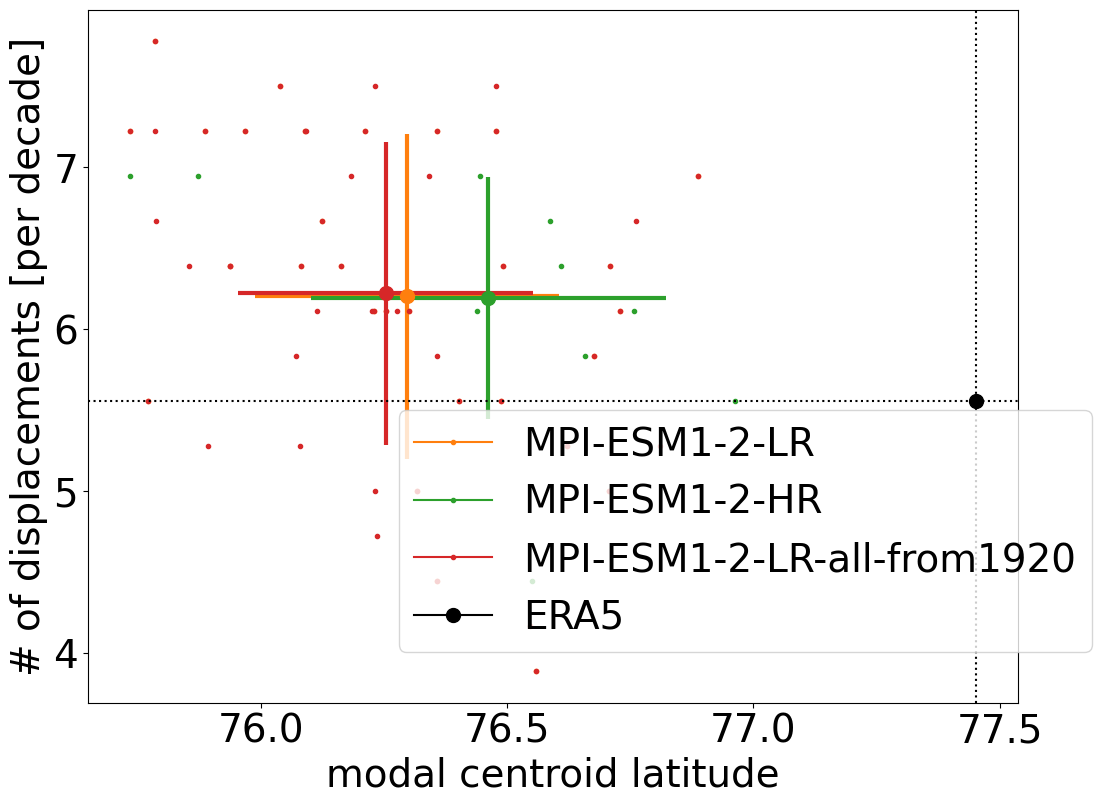

In [10]:
fig, ax = plt.subplots(figsize = (12,9))
wo_outliers = False

model_mode_ls = []
model_ns_ls = []
model_ns_var_ls = []
model_ls_new2 = [
    'MPI-ESM1-2-LR',
     'MPI-ESM1-2-HR', 
 'MPI-ESM1-2-LR-all-from1920',
    'ERA5'
]
for model, color in zip(model_ls_new2, color_ls):
    print(model)
    ds_mode = xr.open_dataset(f'{out_dir}{model}_modes_nc')   
    
    i = 0
   
    if model in ['ERA5']:
        split_dates=np.load(f'{out_dir}{model}_disp_dates_all.npy',allow_pickle=True)
        ns = len(split_dates)/ny*10.
        mode = ds_mode['mode_latcent'].values
        ax.plot(mode,ns, marker = 'o', color = 'k', label = model, ms = ms)
        ax.axhline(ns,color = 'k', ls = ':' )
        ax.axvline(mode,color = 'k', ls = ':')
    else:
        ns_ls = []
        mode_ls = []
        for ens in ds_mode.ens.values:
            print(ens)
            try:
                split_dates=np.load(f'{out_dir}{model}_{ens}_disp_dates_all.npy',allow_pickle=True)
                i+=1
                ns = len(split_dates)/ny*10.
                mode = ds_mode['mode_latcent'].sel(ens = ens).values
                if i == 1:
                    ax.plot(mode,ns, marker = '.', color = color, label = model)
                else:
                    ax.plot(mode,ns, marker = '.', color = color)
                ns_ls.append(ns)
                mode_ls.append(mode)
            except:
                pass
        #sys.exit()
        x = np.mean(mode_ls)
        x_std = np.std(mode_ls)
        y= np.mean(ns_ls)
        y_var = np.var(ns_ls)
        y_std = np.std(ns_ls)
        model_mode_ls.append(xr.DataArray([x], coords = [('model', [model])]))
        model_ns_ls.append(xr.DataArray([y], coords = [('model', [model])]))
        model_ns_var_ls.append(xr.DataArray([y_var], coords = [('model', [model])]))
        #ax.plot(x,y, marker = 'o', color = color,ms = ms)
        ax.errorbar(
            x, y, yerr=y_std, xerr=x_std,
            ms = ms, color = color,
            marker='o',
            lw = 3,
        )

model_mode_da = xr.concat(model_mode_ls, dim = 'model')
model_ns_da = xr.concat(model_ns_ls, dim = 'model')
model_ns_var_da = xr.concat(model_ns_var_ls, dim = 'model')

x = model_mode_da.values
x1 = sm.add_constant(np.column_stack(x).T) #  necessary, negative intercept is unphysical (frequancy of events cannot be <0)
y = model_ns_da.values
order = np.argsort(model_mode_da)


# OLS
if ols_calc:
    model_OLS = sm.OLS(y, x1)
    results = model_OLS.fit()
    #ax.plot(x[order],results.fittedvalues[order], label = 'OLS', color = 'C0', lw = 3)
    pred_ols = results.get_prediction()
    iv_l = pred_ols.summary_frame()["obs_ci_lower"]
    iv_u = pred_ols.summary_frame()["obs_ci_upper"]
    #plt.plot(x[order],iv_u[order], color = 'C0', ls="--", lw = 3)
    #plt.plot(x[order],iv_l[order], color = 'C0',ls="--", lw = 3)      
    #print(results.summary().as_latex())
    r2 = results.rsquared_adj.round(2)
    pv = convert_pvalue_to_asterisks(results.pvalues[-1])#.round(3)
    #ax.text(78.1,8,r"R$^{2}_{adj}$="+f"{r2} ({pv})", color = 'C0')
    #ax.text(78.9,4.5,r"R$^{2}_{adj}$="+f"{r2}", color = 'C0')

if wls_calc:
    model_WLS = sm.WLS(y, x, weights=model_ns_var_da.values)
    results = model_WLS.fit()
    ax.plot(x[order],results.fittedvalues[order], label = 'WLS', color = 'C0', lw = 3)
    pred_ols = results.get_prediction()
    iv_l = pred_ols.summary_frame()["obs_ci_lower"]
    iv_u = pred_ols.summary_frame()["obs_ci_upper"]
    plt.plot(x[order],iv_u[order], color = 'C0', ls="--", lw = 3)
    plt.plot(x[order],iv_l[order], color = 'C0',ls="--", lw = 3)     
    #ax.text(78.5,7,r"R$^{2}$="+f"{r2} ({pv})", color = 'C0')
    ax.text(78.9,7.75,r"R$^{2}$="+f"{r2}", color = 'C0')
    print(results.summary())

if wo_outliers:
    model_OLS = sm.OLS(y[:-how_many], x1[:-how_many])
    results = model_OLS.fit()
    order = np.argsort(model_mode_da[:-how_many])
    ax.plot(x[:-how_many][order],results.fittedvalues[order], label = f'OLS wo {how_many}', color = 'gray', lw = 3)
    
    pred_ols = results.get_prediction()
    iv_l = pred_ols.summary_frame()["obs_ci_lower"]
    iv_u = pred_ols.summary_frame()["obs_ci_upper"]
    plt.plot(x[:-how_many][order],iv_u[order], color = 'gray', ls="--", lw = 3)
    plt.plot(x[:-how_many][order],iv_l[order], color = 'gray',ls="--", lw = 3)     
    
    r2 = results.rsquared_adj.round(2)
    pv = convert_pvalue_to_asterisks(results.pvalues[1])#.round(3)
    ax.text(78.9,5,r"R$^{2}$="+f"{r2} ({pv})", color = 'gray')


# Theil-Sen
res = stats.theilslopes(y,x)
#ax.plot(x, res[1] + res[0] * x, 'r-', label = 'Theil-Sen')

ax.legend(loc='upper right', bbox_to_anchor=(1.1, .45))
plt.ylabel('# of displacements [per decade]')
plt.xlabel('modal centroid latitude')
plt.savefig('displacement_frequency_vs_mode_MPI-ESMs.pdf',bbox_inches='tight')

In [ ]:
ds_mode = xr.open_dataset(f'{out_dir}{model}_modes_nc')   

In [100]:
ds_mode

<xarray.Dataset>
Dimensions:       ()
Data variables:
    mode_aspect   float64 ...
    mode_latcent  float64 77.45

In [99]:
len(ns_ls)

50

In [96]:
model_ns_da

<xarray.DataArray (model: 3)>
array([2.91666667, 6.19444444, 6.26111111])
Coordinates:
  * model    (model) <U17 'MPI-ESM1-2-LR' 'MPI-ESM1-2-HR' 'MPI-ESM1-2-LR-all'

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.041
Model:                            WLS   Adj. R-squared:                 -0.096
Method:                 Least Squares   F-statistic:                    0.2993
Date:                Thu, 04 May 2023   Prob (F-statistic):              0.601
Time:                        13:15:36   Log-Likelihood:                -14.184
No. Observations:                   9   AIC:                             32.37
Df Residuals:                       7   BIC:                             32.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.6938     30.584      0.677      0.5

/home/b/b381258/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


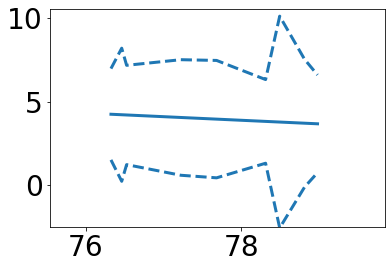

In [65]:
model_WLS = sm.WLS(y, x1, weights=model_ns_var_da.values)
results = model_WLS.fit()
plt.plot(x[order],results.fittedvalues[order], label = 'WLS', color = 'C0', lw = 3)
plt.xlim(ax.get_xlim())
plt.ylim(ax.get_ylim())
pred_ols = results.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]
plt.plot(x[order],iv_u[order], color = 'C0', ls="--", lw = 3)
plt.plot(x[order],iv_l[order], color = 'C0',ls="--", lw = 3)     
#ax.text(1.325,6,r"R$^{2}$="+f"{r2} ({pv})", color = 'C0')
print(results.summary())

In [55]:
np.corrcoef(y,x)

array([[ 1.       , -0.4672339],
       [-0.4672339,  1.       ]])

In [72]:
results.summary().as_latex()

'\\begin{center}\n\\begin{tabular}{lclc}\n\\toprule\n\\textbf{Dep. Variable:}    &        y         & \\textbf{  R-squared:         } &     0.041   \\\\\n\\textbf{Model:}            &       WLS        & \\textbf{  Adj. R-squared:    } &    -0.096   \\\\\n\\textbf{Method:}           &  Least Squares   & \\textbf{  F-statistic:       } &    0.2993   \\\\\n\\textbf{Date:}             & Thu, 04 May 2023 & \\textbf{  Prob (F-statistic):} &    0.601    \\\\\n\\textbf{Time:}             &     13:18:41     & \\textbf{  Log-Likelihood:    } &   -14.184   \\\\\n\\textbf{No. Observations:} &           9      & \\textbf{  AIC:               } &     32.37   \\\\\n\\textbf{Df Residuals:}     &           7      & \\textbf{  BIC:               } &     32.76   \\\\\n\\textbf{Df Model:}         &           1      & \\textbf{                     } &             \\\\\n\\textbf{Covariance Type:}  &    nonrobust     & \\textbf{                     } &             \\\\\n\\bottomrule\n\\end{tabular}\n\\begin{

In [70]:
temp()

/home/b/b381258/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


AttributeError: 'Summary' object has no attribute 'as_latex_tabular'

ERA5
MPI-ESM1-2-LR
UKESM1-0-LL
INM-CM5-0
MPI-ESM1-2-HR
MIROC6
CNRM-CM6-1


Text(0.5, 0, 'modal centroid latitude')

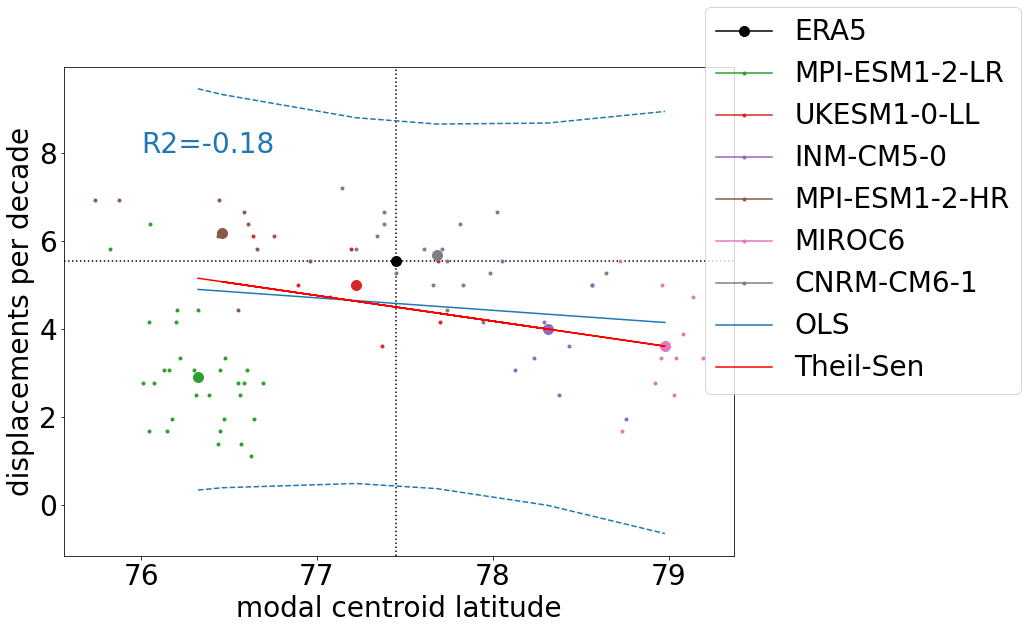

In [38]:
fig, ax = plt.subplots(figsize = (12,9))

model_mode_ls = []
model_ns_ls = []
for model, color in zip(diff_list(model_ls_new, model_ls_out), color_ls):
    print(model)
    ds_mode = xr.open_dataset(f'{out_dir}{model}_modes_nc')   
    
    i = 0
   
    if model in ['ERA5']:
        split_dates=np.load(f'{out_dir}{model}_disp_dates_all.npy',allow_pickle=True)
        ns = len(split_dates)/ny*10.
        mode = ds_mode['mode_latcent'].values
        ax.plot(mode,ns, marker = 'o', color = 'k', label = model, ms = ms)
        ax.axhline(ns,color = 'k', ls = ':' )
        ax.axvline(mode,color = 'k', ls = ':')
    else:
        ns_ls = []
        mode_ls = []
        for ens in ds_mode.ens.values:
            try:
                split_dates=np.load(f'{out_dir}{model}_{ens}_disp_dates_all.npy',allow_pickle=True)
                i+=1
                ns = len(split_dates)/ny*10.
                mode = ds_mode['mode_latcent'].sel(ens = ens).values
                if i == 1:
                    ax.plot(mode,ns, marker = '.', color = color, label = model)
                else:
                    ax.plot(mode,ns, marker = '.', color = color)
                ns_ls.append(ns)
                mode_ls.append(mode)
            except:
                pass
        #sys.exit()
        x = np.mean(mode_ls)
        y= np.mean(ns_ls)
        model_mode_ls.append(xr.DataArray([x], coords = [('model', [model])]))
        model_ns_ls.append(xr.DataArray([y], coords = [('model', [model])]))
        ax.plot(x,y, marker = 'o', color = color,ms = ms)

model_mode_da = xr.concat(model_mode_ls, dim = 'model')
model_ns_da = xr.concat(model_ns_ls, dim = 'model')

x = model_mode_da.values
x1 = sm.add_constant(np.column_stack(x).T)
y = model_ns_da.values
# OLS
model_OLS = sm.OLS(y, x1)
results = model_OLS.fit()
order = np.argsort(model_mode_da)
ax.plot(x[order],results.fittedvalues[order], label = 'OLS')
pred_ols = results.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]
plt.plot(x[order],iv_u[order], color = 'C0', ls="--")
plt.plot(x[order],iv_l[order], color = 'C0',ls="--")       
# Theil-Sen
res = stats.theilslopes(y,x)
ax.plot(x, res[1] + res[0] * x, 'r-', label = 'Theil-Sen')

ax.text(76,8,f"R2={results.rsquared_adj.round(2)}", color = 'C0')
ax.legend(loc='upper right', bbox_to_anchor=(1.45, 1.15))
plt.ylabel('displacements per decade')
plt.xlabel('modal centroid latitude')
#plt.savefig('displacement_frequency_vs_mode.pdf',bbox_inches='tight')

In [37]:
results.summary()

/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                 -0.182
Method:                 Least Squares   F-statistic:                    0.2288
Date:                Tue, 02 May 2023   Prob (F-statistic):              0.657
Time:                        16:50:04   Log-Likelihood:                -9.2344
No. Observations:                   6   AIC:                             22.47
Df Residuals:                       4   BIC:                             22.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.5651     45.984      0.578      0.594    -101.106     154.236
x1            -0.2838      0.593     -0.478      0.657      -1.931       1.363
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.785
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.401
Skew:                          -0.463   Prob(JB):                        0.818
Kurtosis:                       2.136   Cond. No.                     6.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""